# Dossier de modélisation statitique 

Quentin GENSE - Gwénaël PETIT - Anita RIVOT - Louis SOYEZ

## Description du sujet et de la base de données 

Sujet : 
Données et variables : 
Source : 

In [1]:
#Bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importation des données
data = pd.read_csv("train.csv")
data

X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## Statistiques univariées

### Préparation des données

In [3]:
#Liste des variables
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Selection des variables
df1 = data[['SalePrice', 'OverallQual','GrLivArea','GarageCars','GarageArea', 'TotalBsmtSF' ,'1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd',
         'Fireplaces', 'FireplaceQu', 'FullBath', 'HalfBath', 'KitchenQual', 'BsmtHalfBath','BsmtFullBath','BsmtQual', 'BsmtFinSF1', 
            'Neighborhood', 'LotArea', 'ExterQual','HouseStyle' , 'GarageYrBlt', 'YrSold', 'OpenPorchSF','EnclosedPorch','ScreenPorch','3SsnPorch', 
            'MSZoning']]
df1

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  2ndFlrSF  YearBuilt  YearRemodAdd  ...  LotArea ExterQual  \
0          856       854       2003          2003  ...     8450        Gd   
1         1262         0       1976          1976  ...     9600        TA   
2          920       866       2001          2002  ...    11250        Gd   
3          961       756       1915          1970  ...     9550        TA   
4         1145      1053       2000          2000  ...    14260        Gd   
...        ...       ...        ...           ...  ...      ...       ...   
1455       953       694       1999          2000  ...     7917        TA   
1456      2073         0       1978          1988  ...    13175        TA   
1457      1188      1152       1941          2006  ...     9042        Ex   
1458      1078         0       1950          1996  ...     9717        TA   
1459      1256         0       1965          1965  ...     9937        Gd   

      HouseStyle  GarageYrBlt YrSold  OpenPorchSF  EnclosedPorch ScreenPorch  \
0         2Story       2003.0   2008           61              0           0   
1         1Story       1976.0   2007            0              0           0   
2         2Story       2001.0   2008           42              0           0   
3         2Story       1998.0   2006           35            272           0   
4         2Story       2000.0   2008           84              0           0   
...          ...          ...    ...          ...            ...         ...   
1455      2Story       1999.0   2007           40              0           0   
1456      1Story       1978.0   2010            0              0           0   
1457      2Story       1941.0   2010           60              0           0   
1458      1Story       1950.0   2010            0            112           0   
1459      1Story       1965.0   2008           68              0           0   

      3SsnPorch MSZoning  
0             0       RL  
1             0       RL  
2             0       RL  
3             0       RL  
4             0       RL  
...         ...      ...  
1455          0       RL  
1456          0       RL  
1457          0       RL  
1458          0       RL  
1459          0       RL  

[1460 rows x 30 columns]

In [5]:
#Création de la variable NbFloors
df1['2ndFlrSF'].value_counts()
df1.loc[:, 'NbFloors'] = np.where(data['2ndFlrSF'] > 0, 1, 0)

C:\Users\QuentinGENSE\AppData\Local\Temp\ipykernel_36032\4131601470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'NbFloors'] = np.where(data['2ndFlrSF'] > 0, 1, 0)


In [6]:
df1

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  2ndFlrSF  YearBuilt  YearRemodAdd  ...  ExterQual HouseStyle  \
0          856       854       2003          2003  ...         Gd     2Story   
1         1262         0       1976          1976  ...         TA     1Story   
2          920       866       2001          2002  ...         Gd     2Story   
3          961       756       1915          1970  ...         TA     2Story   
4         1145      1053       2000          2000  ...         Gd     2Story   
...        ...       ...        ...           ...  ...        ...        ...   
1455       953       694       1999          2000  ...         TA     2Story   
1456      2073         0       1978          1988  ...         TA     1Story   
1457      1188      1152       1941          2006  ...         Ex     2Story   
1458      1078         0       1950          1996  ...         TA     1Story   
1459      1256         0       1965          1965  ...         Gd     1Story   

      GarageYrBlt  YrSold OpenPorchSF  EnclosedPorch  ScreenPorch 3SsnPorch  \
0          2003.0    2008          61              0            0         0   
1          1976.0    2007           0              0            0         0   
2          2001.0    2008          42              0            0         0   
3          1998.0    2006          35            272            0         0   
4          2000.0    2008          84              0            0         0   
...           ...     ...         ...            ...          ...       ...   
1455       1999.0    2007          40              0            0         0   
1456       1978.0    2010           0              0            0         0   
1457       1941.0    2010          60              0            0         0   
1458       1950.0    2010           0            112            0         0   
1459       1965.0    2008          68              0            0         0   

      MSZoning NbFloors  
0           RL        1  
1           RL        0  
2           RL        1  
3           RL        1  
4           RL        1  
...        ...      ...  
1455        RL        1  
1456        RL        0  
1457        RL        1  
1458        RL        0  
1459        RL        0  

[1460 rows x 31 columns]

In [7]:
#Création de la variable TotalSF
df1['TotalSF'] = df1['1stFlrSF'] + df1['2ndFlrSF']

C:\Users\QuentinGENSE\AppData\Local\Temp\ipykernel_36032\364744390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalSF'] = df1['1stFlrSF'] + df1['2ndFlrSF']


In [8]:
df1

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  2ndFlrSF  YearBuilt  YearRemodAdd  ...  HouseStyle  \
0          856       854       2003          2003  ...      2Story   
1         1262         0       1976          1976  ...      1Story   
2          920       866       2001          2002  ...      2Story   
3          961       756       1915          1970  ...      2Story   
4         1145      1053       2000          2000  ...      2Story   
...        ...       ...        ...           ...  ...         ...   
1455       953       694       1999          2000  ...      2Story   
1456      2073         0       1978          1988  ...      1Story   
1457      1188      1152       1941          2006  ...      2Story   
1458      1078         0       1950          1996  ...      1Story   
1459      1256         0       1965          1965  ...      1Story   

     GarageYrBlt  YrSold  OpenPorchSF EnclosedPorch  ScreenPorch  3SsnPorch  \
0         2003.0    2008           61             0            0          0   
1         1976.0    2007            0             0            0          0   
2         2001.0    2008           42             0            0          0   
3         1998.0    2006           35           272            0          0   
4         2000.0    2008           84             0            0          0   
...          ...     ...          ...           ...          ...        ...   
1455      1999.0    2007           40             0            0          0   
1456      1978.0    2010            0             0            0          0   
1457      1941.0    2010           60             0            0          0   
1458      1950.0    2010            0           112            0          0   
1459      1965.0    2008           68             0            0          0   

     MSZoning  NbFloors TotalSF  
0          RL         1    1710  
1          RL         0    1262  
2          RL         1    1786  
3          RL         1    1717  
4          RL         1    2198  
...       ...       ...     ...  
1455       RL         1    1647  
1456       RL         0    2073  
1457       RL         1    2340  
1458       RL         0    1078  
1459       RL         0    1256  

[1460 rows x 32 columns]

In [9]:
#Création d'une variable pour caluculer l'age du bien
df1['Age'] = df1['YrSold'] - df1['YearBuilt']

C:\Users\QuentinGENSE\AppData\Local\Temp\ipykernel_36032\3430854747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = df1['YrSold'] - df1['YearBuilt']


In [10]:
df1

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  2ndFlrSF  YearBuilt  YearRemodAdd  ...  GarageYrBlt YrSold  \
0          856       854       2003          2003  ...       2003.0   2008   
1         1262         0       1976          1976  ...       1976.0   2007   
2          920       866       2001          2002  ...       2001.0   2008   
3          961       756       1915          1970  ...       1998.0   2006   
4         1145      1053       2000          2000  ...       2000.0   2008   
...        ...       ...        ...           ...  ...          ...    ...   
1455       953       694       1999          2000  ...       1999.0   2007   
1456      2073         0       1978          1988  ...       1978.0   2010   
1457      1188      1152       1941          2006  ...       1941.0   2010   
1458      1078         0       1950          1996  ...       1950.0   2010   
1459      1256         0       1965          1965  ...       1965.0   2008   

      OpenPorchSF  EnclosedPorch ScreenPorch  3SsnPorch  MSZoning NbFloors  \
0              61              0           0          0        RL        1   
1               0              0           0          0        RL        0   
2              42              0           0          0        RL        1   
3              35            272           0          0        RL        1   
4              84              0           0          0        RL        1   
...           ...            ...         ...        ...       ...      ...   
1455           40              0           0          0        RL        1   
1456            0              0           0          0        RL        0   
1457           60              0           0          0        RL        1   
1458            0            112           0          0        RL        0   
1459           68              0           0          0        RL        0   

      TotalSF Age  
0        1710   5  
1        1262  31  
2        1786   7  
3        1717  91  
4        2198   8  
...       ...  ..  
1455     1647   8  
1456     2073  32  
1457     2340  69  
1458     1078  60  
1459     1256  43  

[1460 rows x 33 columns]

In [11]:
#Calcul de la taille totale en salle de bain
df1['TotalBath'] = df1['FullBath'] + 0.5*df1['HalfBath'] + df1['BsmtFullBath'] + 0.5*df1['BsmtHalfBath']

C:\Users\QuentinGENSE\AppData\Local\Temp\ipykernel_36032\907296568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalBath'] = df1['FullBath'] + 0.5*df1['HalfBath'] + df1['BsmtFullBath'] + 0.5*df1['BsmtHalfBath']


In [12]:
df1

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  2ndFlrSF  YearBuilt  YearRemodAdd  ...  YrSold OpenPorchSF  \
0          856       854       2003          2003  ...    2008          61   
1         1262         0       1976          1976  ...    2007           0   
2          920       866       2001          2002  ...    2008          42   
3          961       756       1915          1970  ...    2006          35   
4         1145      1053       2000          2000  ...    2008          84   
...        ...       ...        ...           ...  ...     ...         ...   
1455       953       694       1999          2000  ...    2007          40   
1456      2073         0       1978          1988  ...    2010           0   
1457      1188      1152       1941          2006  ...    2010          60   
1458      1078         0       1950          1996  ...    2010           0   
1459      1256         0       1965          1965  ...    2008          68   

      EnclosedPorch  ScreenPorch 3SsnPorch  MSZoning  NbFloors TotalSF  Age  \
0                 0            0         0        RL         1    1710    5   
1                 0            0         0        RL         0    1262   31   
2                 0            0         0        RL         1    1786    7   
3               272            0         0        RL         1    1717   91   
4                 0            0         0        RL         1    2198    8   
...             ...          ...       ...       ...       ...     ...  ...   
1455              0            0         0        RL         1    1647    8   
1456              0            0         0        RL         0    2073   32   
1457              0            0         0        RL         1    2340   69   
1458            112            0         0        RL         0    1078   60   
1459              0            0         0        RL         0    1256   43   

     TotalBath  
0          3.5  
1          2.5  
2          3.5  
3          2.0  
4          3.5  
...        ...  
1455       2.5  
1456       3.0  
1457       2.0  
1458       2.0  
1459       2.5  

[1460 rows x 34 columns]

In [13]:
df1['TotalPorchSF'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['3SsnPorch']
df1

C:\Users\QuentinGENSE\AppData\Local\Temp\ipykernel_36032\2082817693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalPorchSF'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['3SsnPorch']


SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  2ndFlrSF  YearBuilt  YearRemodAdd  ...  OpenPorchSF  \
0          856       854       2003          2003  ...           61   
1         1262         0       1976          1976  ...            0   
2          920       866       2001          2002  ...           42   
3          961       756       1915          1970  ...           35   
4         1145      1053       2000          2000  ...           84   
...        ...       ...        ...           ...  ...          ...   
1455       953       694       1999          2000  ...           40   
1456      2073         0       1978          1988  ...            0   
1457      1188      1152       1941          2006  ...           60   
1458      1078         0       1950          1996  ...            0   
1459      1256         0       1965          1965  ...           68   

     EnclosedPorch  ScreenPorch  3SsnPorch MSZoning  NbFloors  TotalSF Age  \
0                0            0          0       RL         1     1710   5   
1                0            0          0       RL         0     1262  31   
2                0            0          0       RL         1     1786   7   
3              272            0          0       RL         1     1717  91   
4                0            0          0       RL         1     2198   8   
...            ...          ...        ...      ...       ...      ...  ..   
1455             0            0          0       RL         1     1647   8   
1456             0            0          0       RL         0     2073  32   
1457             0            0          0       RL         1     2340  69   
1458           112            0          0       RL         0     1078  60   
1459             0            0          0       RL         0     1256  43   

      TotalBath TotalPorchSF  
0           3.5           61  
1           2.5            0  
2           3.5           42  
3           2.0          307  
4           3.5           84  
...         ...          ...  
1455        2.5           40  
1456        3.0            0  
1457        2.0           60  
1458        2.0          112  
1459        2.5           68  

[1460 rows x 35 columns]

SalePrice          0
OverallQual        0
GrLivArea          0
GarageCars         0
GarageArea         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
YearBuilt          0
YearRemodAdd       0
Fireplaces         0
FireplaceQu      690
FullBath           0
HalfBath           0
KitchenQual        0
BsmtHalfBath       0
BsmtFullBath       0
BsmtQual          37
BsmtFinSF1         0
Neighborhood       0
LotArea            0
ExterQual          0
HouseStyle         0
GarageYrBlt       81
YrSold             0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
3SsnPorch          0
MSZoning           0
NbFloors           0
TotalSF            0
Age                0
TotalBath          0
TotalPorchSF       0
dtype: int64

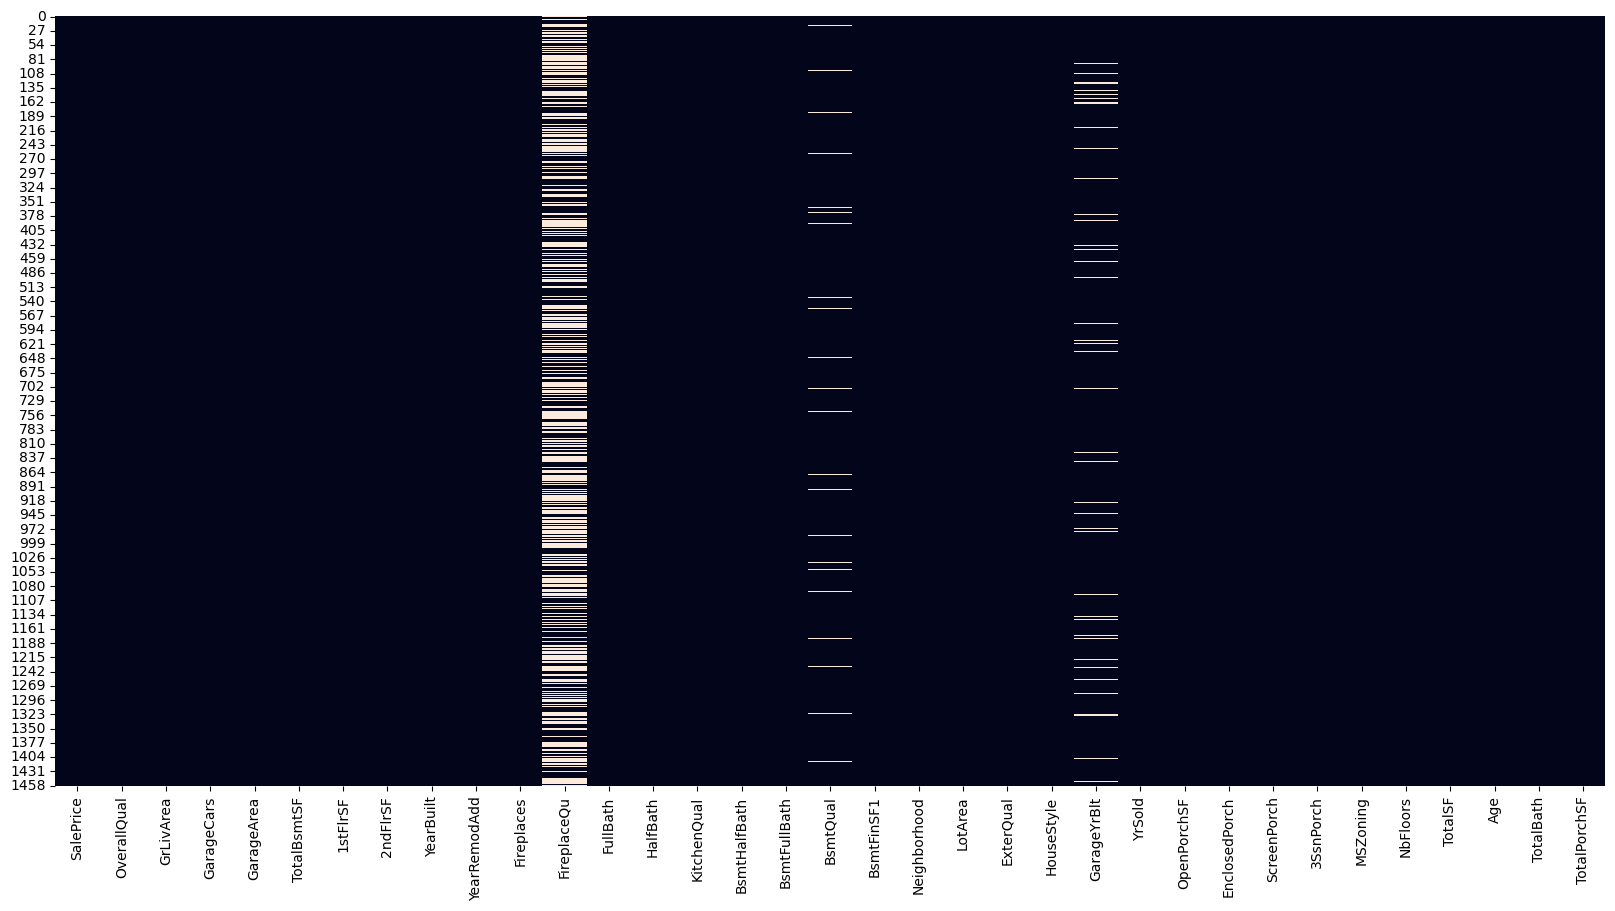

In [14]:
#identification des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)
df1.isnull().sum()

In [15]:
#identification des types 
df1.dtypes.value_counts()

int64      25
object      7
float64     2
int32       1
Name: count, dtype: int64

In [16]:
X = df1.drop(columns=['SalePrice'])
y = df1['SalePrice']
variables_quantitatives = X.select_dtypes('int', 'float')
variables_qualitatives = X.select_dtypes('object')

# Variables Quantitatives

A REFAIRE

In [17]:
from scipy.stats import skew

def analyse(X,var,y):
    data = X[var].dropna()

    plt.figure(figsize=(12, 4))

    # Histogramme + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data, color='lightcoral')
    plt.title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()

    #Stats
    print("-------------------------------------")
    print("STATISTIQUES DESCRIPTIVES")
    print("-------------------------------------")
    print("Min : ", data.min())
    print("Max : ", data.max())
    print("Moyenne : ", data.mean())
    print("Ecart-type : ", data.std())
    print("Q1 ", data.quantile(0.25))
    print("Q2 : ", data.median())
    print("Q3 ", data.quantile(0.75))
    print("IQR ", data.quantile(0.75) - data.quantile(0.25))

    print("\n-------------------------------------")
    print("QUANTILES EXTREMES")
    print("-------------------------------------")
    print("1% ", data.quantile(0.01))
    print("5% ", data.quantile(0.05))
    print("95% ", data.quantile(0.95))
    print("99% ", data.quantile(0.99))

    # Détection des valeurs aberrantes
    # Skewness
    skewness = skew(data)
    print("\n-------------------------------------")
    print("ASYMETRIE")
    print("-------------------------------------")
    print(f"Skewness de {var} : {skewness:.3f}")

    # Détection des outliers (règle des 1.5*IQR)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]


    print("\n-------------------------------------")
    print("LIEN AVEC LA VARIABLE CIBLE")
    print("-------------------------------------")
    print("Correlation linéaire avec y: ",np.corrcoef(data,y)[0,1])




In [18]:
variables_quantitatives.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'FullBath', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1',
       'LotArea', 'YrSold', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       '3SsnPorch', 'NbFloors', 'TotalSF', 'Age', 'TotalPorchSF'],
      dtype='object')

## OverallQual

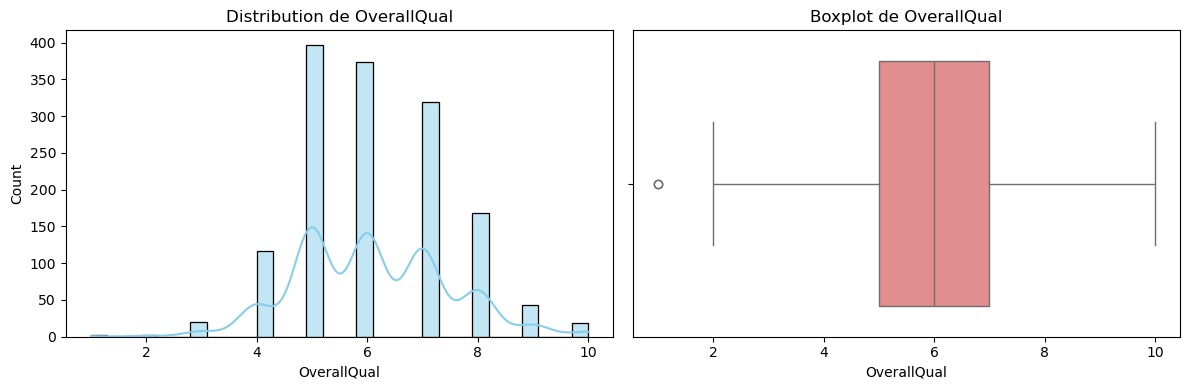

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1
Max :  10
Moyenne :  6.0993150684931505
Ecart-type :  1.3829965467415923
Q1  5.0
Q2 :  6.0
Q3  7.0
IQR  2.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  3.0
5%  4.0
95%  8.0
99%  10.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de OverallQual : 0.217

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.7909816005838052


In [19]:
analyse(X,'OverallQual',y)

## GrLivArea

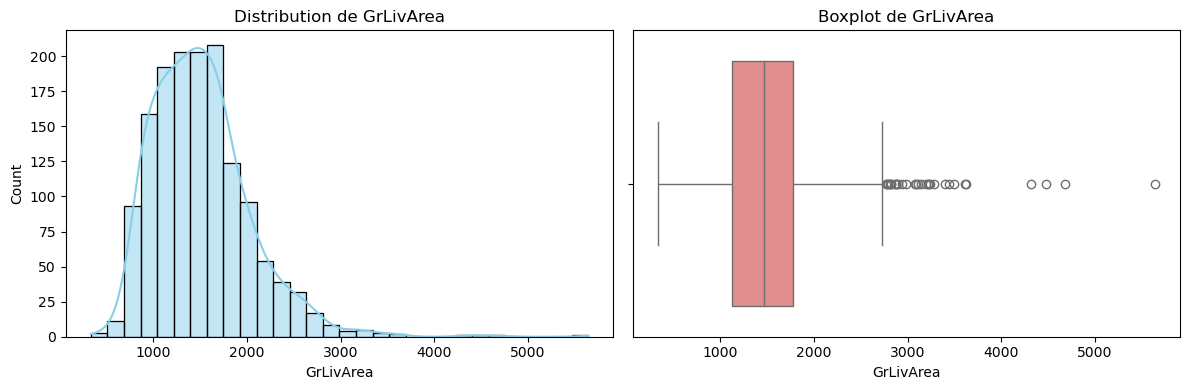

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  334
Max :  5642
Moyenne :  1515.463698630137
Ecart-type :  525.4803834232027
Q1  1129.5
Q2 :  1464.0
Q3  1776.75
IQR  647.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  692.18
5%  848.0
95%  2466.1
99%  3123.4800000000023

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GrLivArea : 1.365

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.7086244776126522


In [20]:
analyse(X,'GrLivArea',y)

In [21]:
import numpy as np
X['GrLivArea_log'] = np.log1p(X['GrLivArea'])

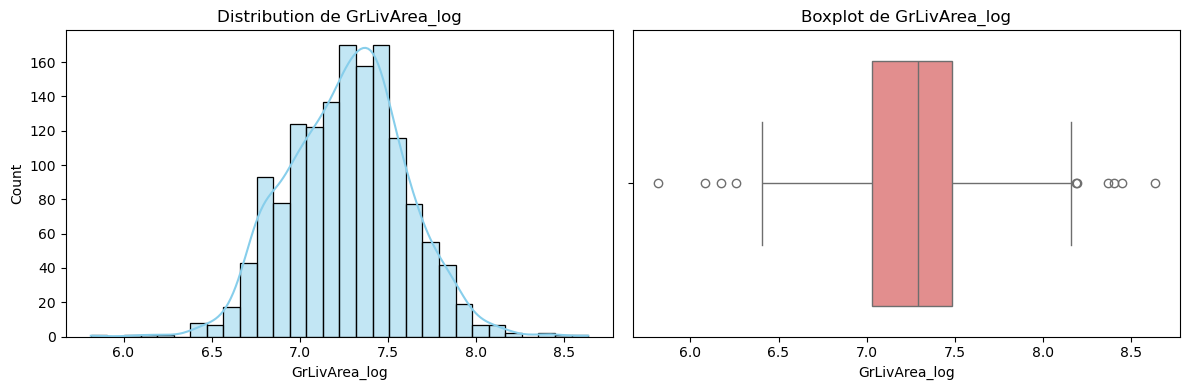

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  5.814130531825066
Max :  8.63817111796914
Moyenne :  7.268511760585581
Ecart-type :  0.33330300926507583
Q1  7.030414998124506
Q2 :  7.289610521451167
Q3  7.483103531937521
IQR  0.4526885338130153

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.541288698502259
5%  6.744059186311348
95%  7.810798635170148
99%  8.047013445371395

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GrLivArea_log : -0.006

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6951473252879425


In [22]:
analyse(X, 'GrLivArea_log', y)

In [23]:
X['GrLivArea_log_capped'] = X['GrLivArea_log'].clip(upper=X['GrLivArea_log'].quantile(0.99), lower=X['GrLivArea_log'].quantile(0.01))

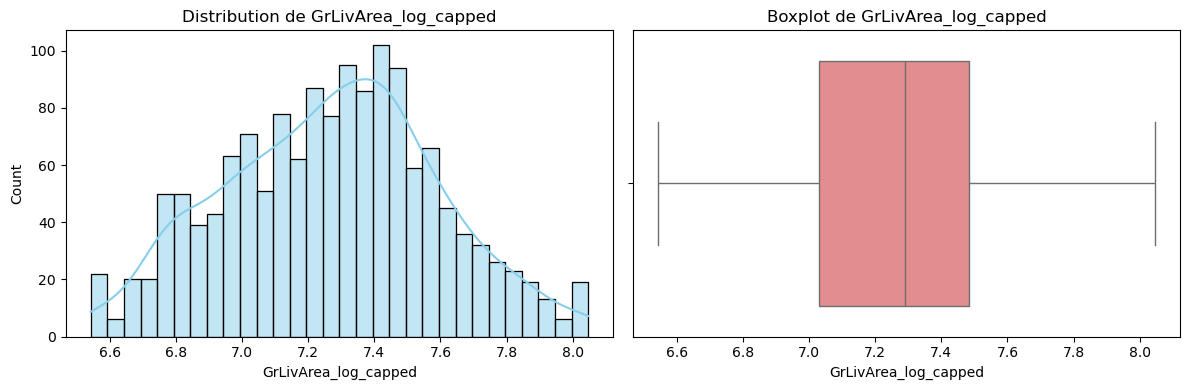

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  6.541288698502259
Max :  8.047013445371395
Moyenne :  7.268696304932476
Ecart-type :  0.32327502271865827
Q1  7.030414998124506
Q2 :  7.289610521451167
Q3  7.483103531937521
IQR  0.4526885338130153

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.541986823084941
5%  6.744059186311348
95%  7.810798635170148
99%  8.04484739316282

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GrLivArea_log_capped : -0.000

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6929417951832889


In [24]:
analyse(X, 'GrLivArea_log_capped', y)

## GarageCars

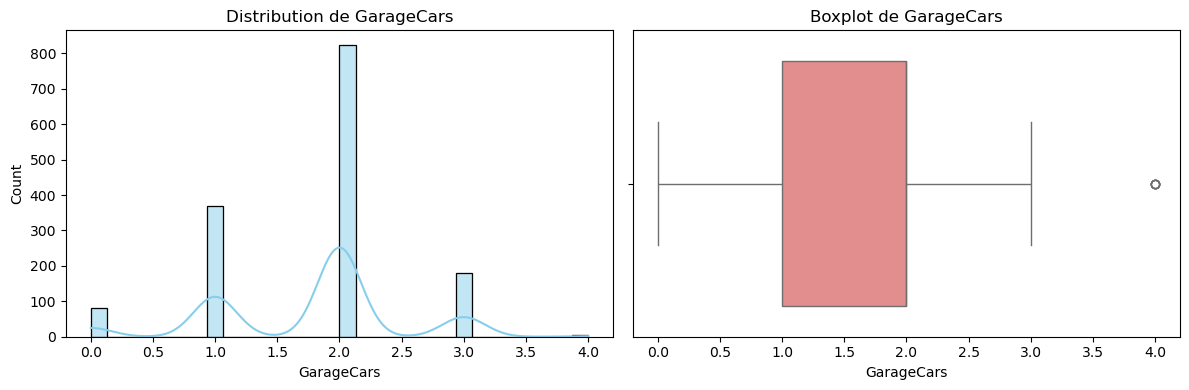

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  4
Moyenne :  1.7671232876712328
Ecart-type :  0.7473150101111116
Q1  1.0
Q2 :  2.0
Q3  2.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  3.0
99%  3.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GarageCars : -0.342

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6404091972583515


In [25]:
analyse(X, 'GarageCars', y)

## GarageArea

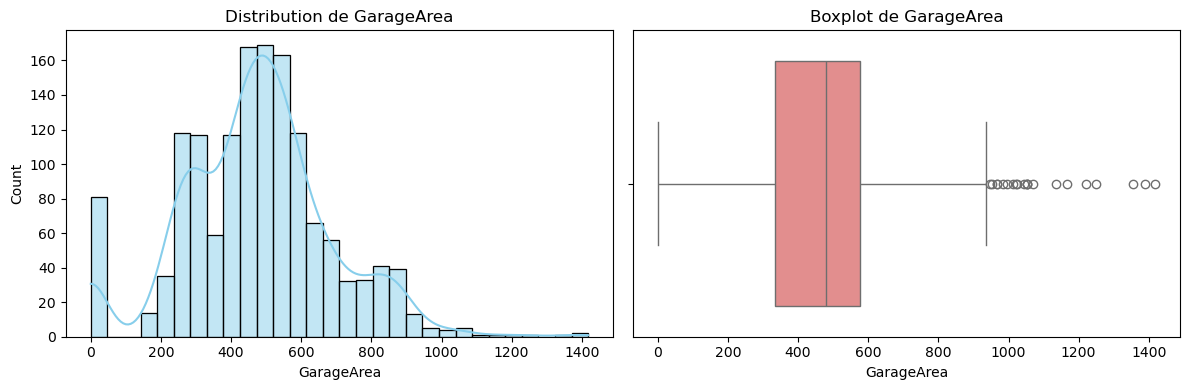

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1418
Moyenne :  472.9801369863014
Ecart-type :  213.80484145338076
Q1  334.5
Q2 :  480.0
Q3  576.0
IQR  241.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  850.0999999999999
99%  1002.7900000000016

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GarageArea : 0.180

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6234314389183618


In [26]:
analyse(X, 'GarageArea', y)

In [27]:
X['GarageArea_capped'] = X['GarageArea'].clip(upper=X['GarageArea'].quantile(0.95))

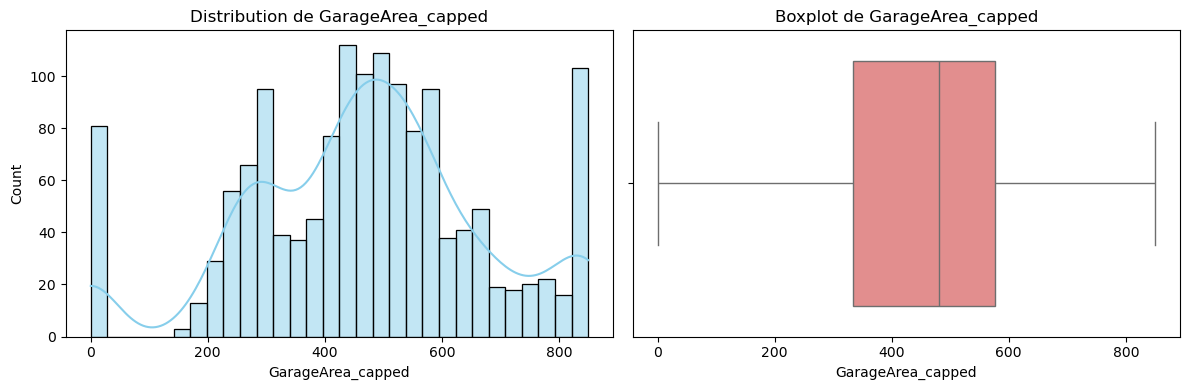

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  850.0999999999999
Moyenne :  468.1878767123288
Ecart-type :  202.06470810466658
Q1  334.5
Q2 :  480.0
Q3  576.0
IQR  241.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  850.005
99%  850.0999999999999

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de GarageArea_capped : -0.193

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.630197891299789


In [28]:
analyse(X, 'GarageArea_capped', y)

## TotalBsmtSF

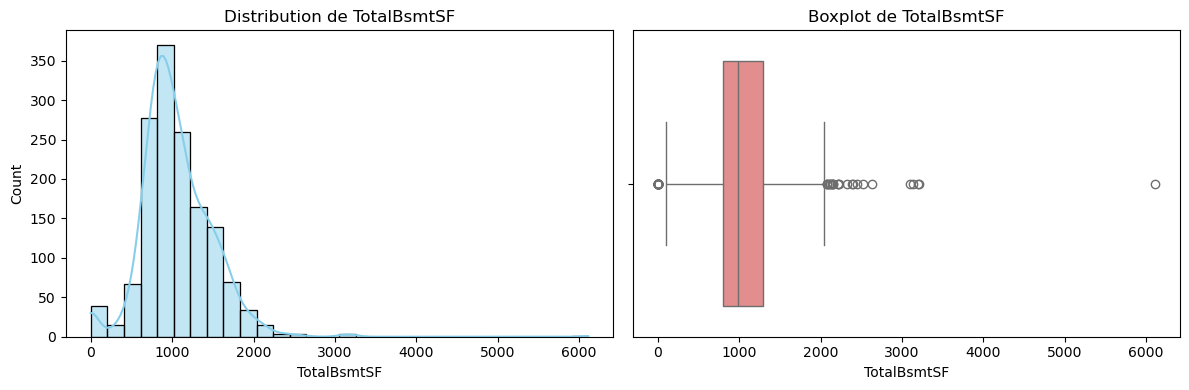

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  6110
Moyenne :  1057.4294520547944
Ecart-type :  438.7053244594705
Q1  795.75
Q2 :  991.5
Q3  1298.25
IQR  502.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  519.3000000000001
95%  1753.0
99%  2155.05

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalBsmtSF : 1.523

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6135805515591953


In [29]:
analyse(X, 'TotalBsmtSF', y)

In [30]:
X['TotalBsmtSF_capped'] = X['TotalBsmtSF'].clip(upper=X['TotalBsmtSF'].quantile(0.95), lower=X['TotalBsmtSF'].quantile(0.03))

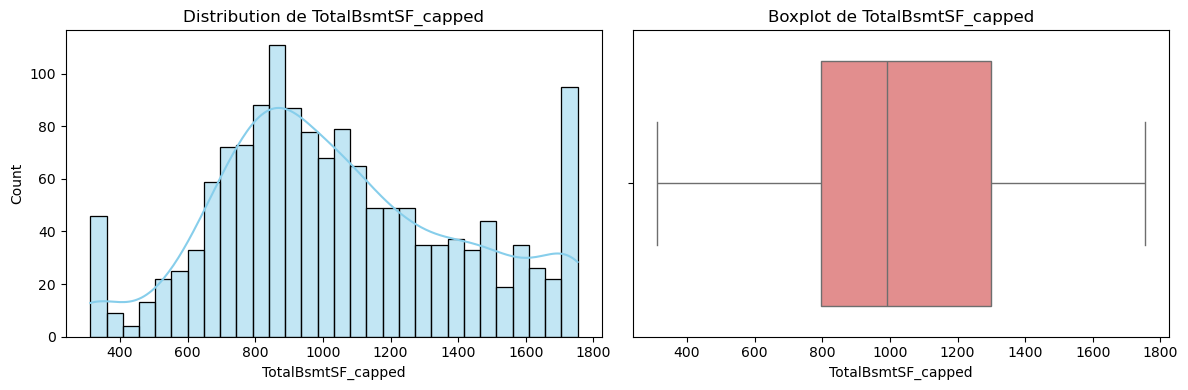

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  312.32999999999987
Max :  1753.0
Moyenne :  1048.0592602739725
Ecart-type :  360.8823303470017
Q1  795.75
Q2 :  991.5
Q3  1298.25
IQR  502.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  312.32999999999987
5%  519.3000000000001
95%  1753.0
99%  1753.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalBsmtSF_capped : 0.274

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.622469143727161


In [31]:
analyse(X, 'TotalBsmtSF_capped', y)

## 1stFlrSF

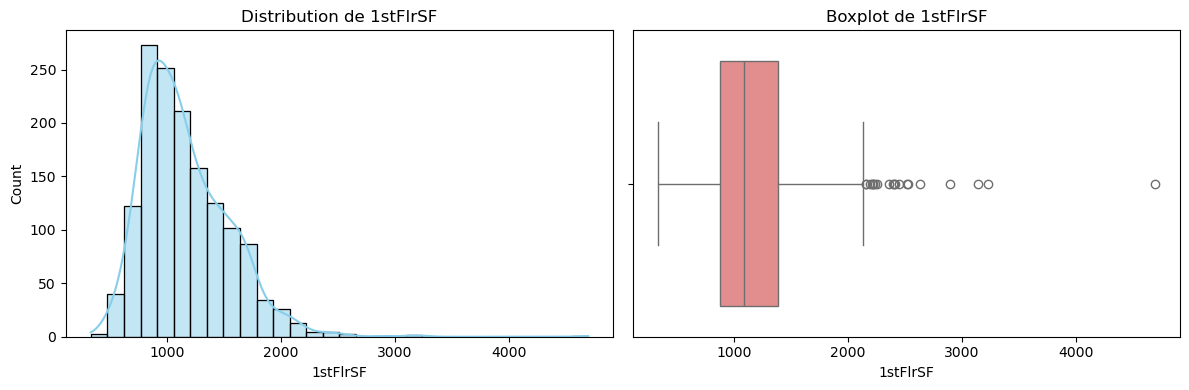

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  334
Max :  4692
Moyenne :  1162.626712328767
Ecart-type :  386.5877380410738
Q1  882.0
Q2 :  1087.0
Q3  1391.25
IQR  509.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  520.0
5%  672.95
95%  1831.2499999999998
99%  2219.4600000000005

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 1stFlrSF : 1.375

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.6058521846919145


In [32]:
analyse(X, '1stFlrSF', y)

L'analyse statistique montre que 1stFlrSF est assimétrique vers la droite (skewness de 1.375), avec une médiane de 1464. L'écart-type est de 386.59 ce qui indique une variabilité notable autour de la moyenne (1162.63). L'écart interquartille compris entre 882 et 1391.25 indique que les valeurs sont essentiellement regroupé autour de cette zone centrale.

Etude des extrêmes : 
- 99% de nos données sont au dessous de 2219.46, ce qui signifie qu'un faible groupe de donnée se trouve dans des valeurs extrêmes. 
- Les valeurs entre 2219.46 et 4692 peuvent être considéré comme très influente sur le modèle

Pour palier à celà, nous allons appliquer une transformation logarithmique afin de limiter l'impact des valeurs extrêmes

In [33]:
X['1stFlrSF_log'] = np.log1p(X['1stFlrSF'])

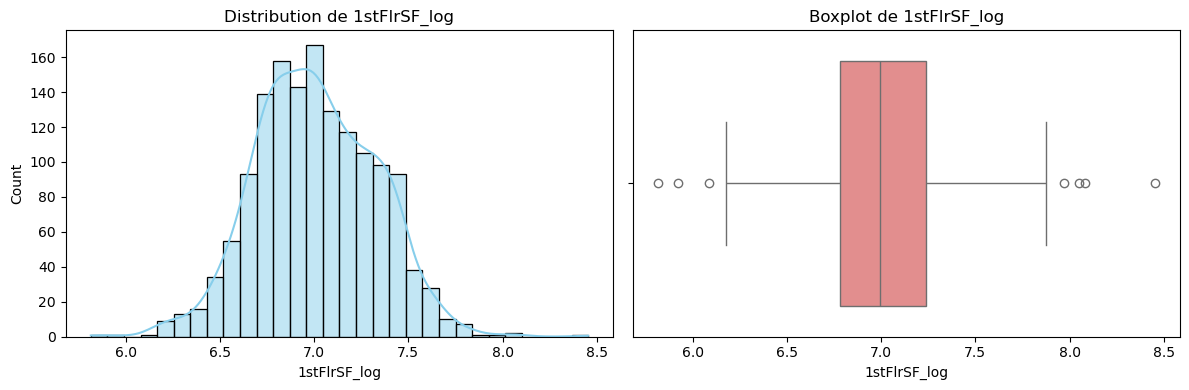

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  5.814130531825066
Max :  8.453827315794417
Moyenne :  7.0084524943231585
Ecart-type :  0.31743113076983664
Q1  6.78332520060396
Q2 :  6.992096005027085
Q3  7.238676374115725
IQR  0.45535117351176524

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.255750041753367
5%  6.513155871848928
95%  7.513299822233128
99%  7.705468777768979

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 1stFlrSF_log : 0.080

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5912990620354679


In [34]:
analyse(X, '1stFlrSF_log', y)

In [35]:
X['1stFlrSF_log_capped'] = X['1stFlrSF_log'].clip(upper=X['1stFlrSF_log'].quantile(0.99), lower=X['1stFlrSF_log'].quantile(0.01))

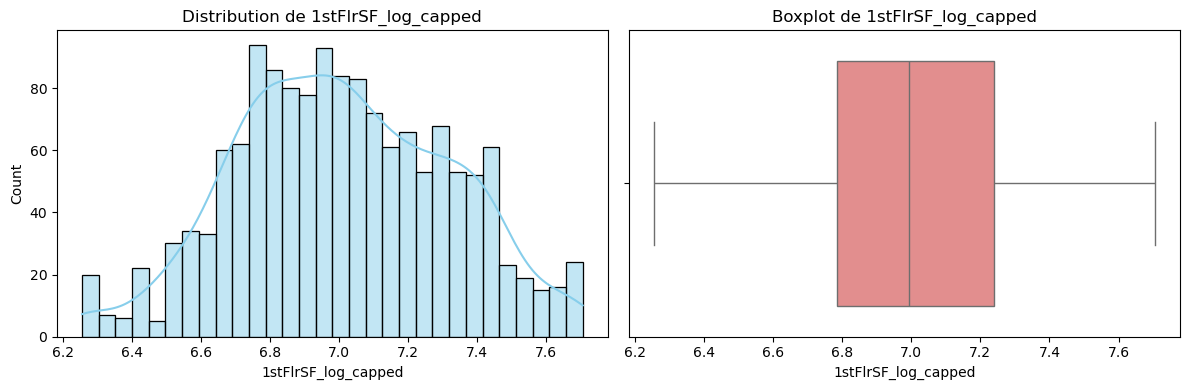

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  6.255750041753367
Max :  7.705468777768979
Moyenne :  7.007774459258791
Ecart-type :  0.3093793490453708
Q1  6.78332520060396
Q2 :  6.992096005027085
Q3  7.238676374115725
IQR  0.45535117351176524

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.255750041753367
5%  6.513155871848928
95%  7.513299822233128
99%  7.704815287952366

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 1stFlrSF_log_capped : 0.031

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5919806179453493


In [36]:
analyse(X, '1stFlrSF_log_capped', y)

## 2ndFlrSF

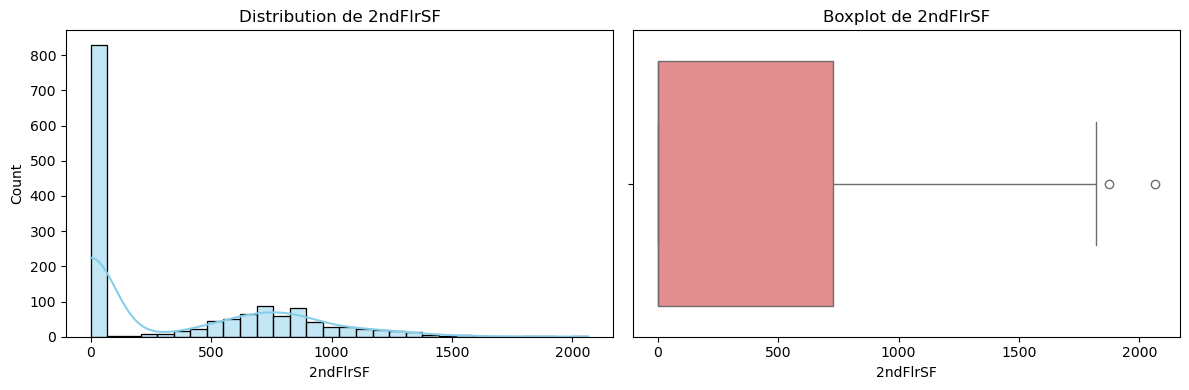

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2065
Moyenne :  346.99246575342465
Ecart-type :  436.5284358862591
Q1  0.0
Q2 :  0.0
Q3  728.0
IQR  728.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1141.05
99%  1418.920000000001

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 2ndFlrSF : 0.812

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.3193338028320681


In [37]:
analyse(X, '2ndFlrSF',y)

In [38]:
X['has_2ndFlr'] = (X['2ndFlrSF'] > 0).astype(int)

## YearBuilt

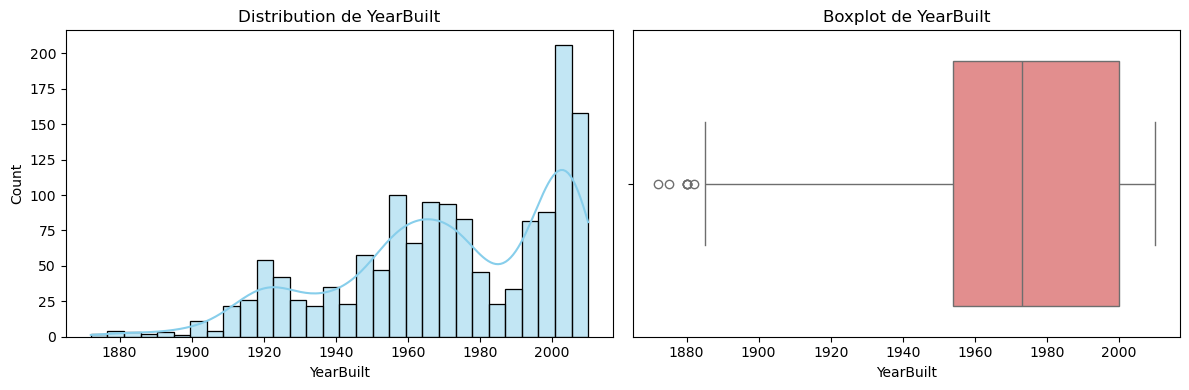

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1872
Max :  2010
Moyenne :  1971.267808219178
Ecart-type :  30.202904042525265
Q1  1954.0
Q2 :  1973.0
Q3  2000.0
IQR  46.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1899.18
5%  1916.0
95%  2007.0
99%  2009.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de YearBuilt : -0.613

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5228973328794971


In [39]:
analyse(X, 'YearBuilt', y)

## YearRemodAdd

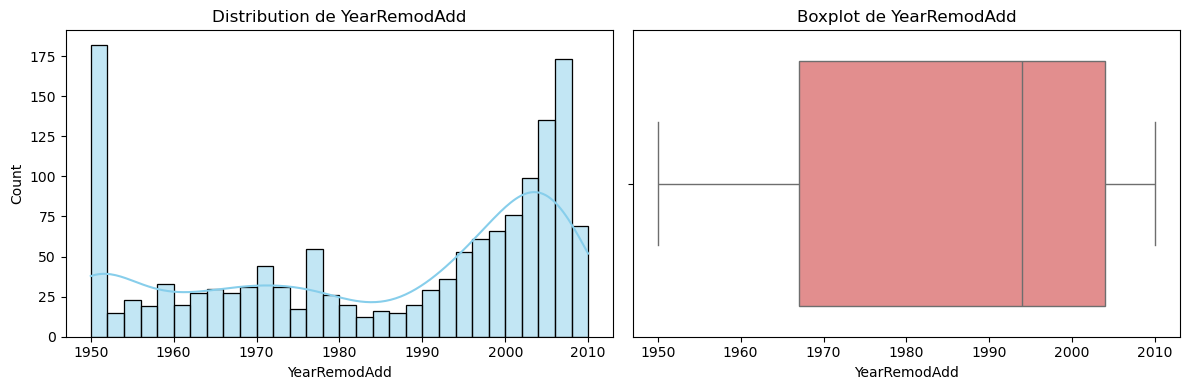

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1950
Max :  2010
Moyenne :  1984.8657534246574
Ecart-type :  20.645406807709396
Q1  1967.0
Q2 :  1994.0
Q3  2004.0
IQR  37.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1950.0
5%  1950.0
95%  2007.0
99%  2009.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de YearRemodAdd : -0.503

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5071009671113864


In [40]:
analyse(X, 'YearRemodAdd', y)

## Fireplaces

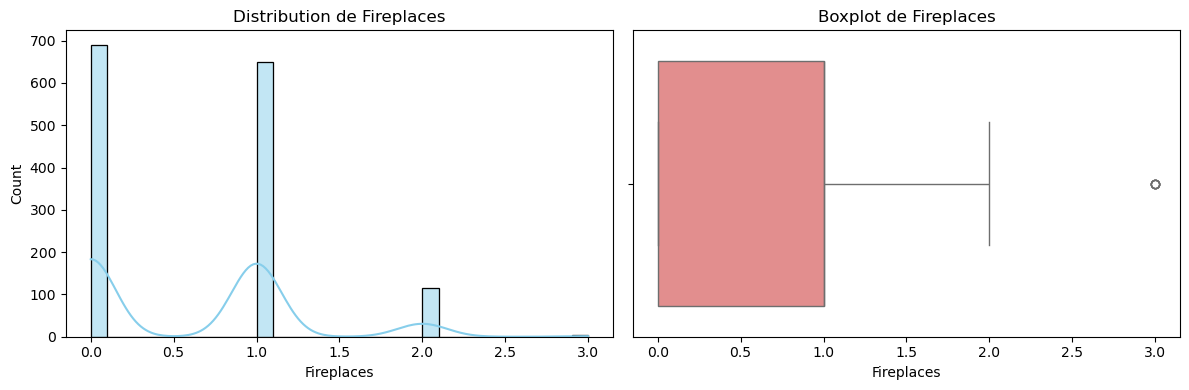

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  3
Moyenne :  0.613013698630137
Ecart-type :  0.6446663863122344
Q1  0.0
Q2 :  1.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  2.0
99%  2.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Fireplaces : 0.649

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.46692883675152697


In [41]:
analyse(X, 'Fireplaces', y)

In [42]:
X['Fireplaces_log'] = np.log1p(X['Fireplaces'])

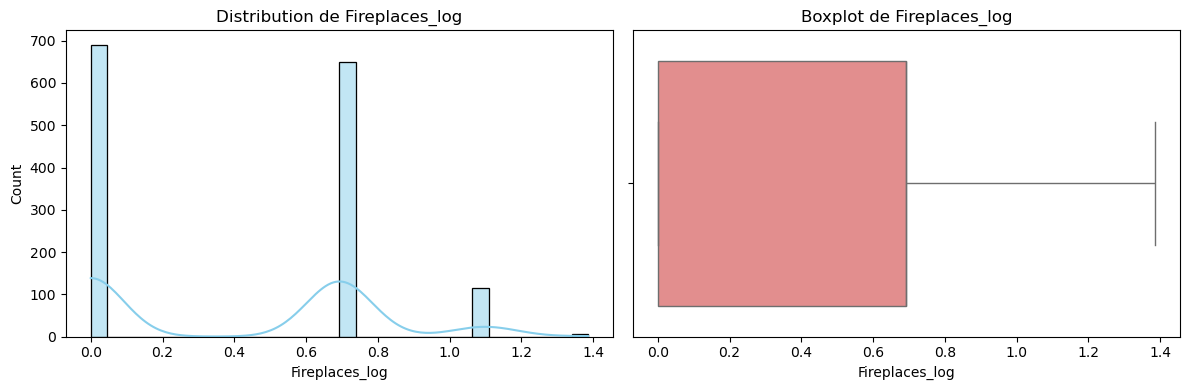

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  1.3862943611198906
Moyenne :  0.39987503586739487
Ecart-type :  0.3946598513966133
Q1  0.0
Q2 :  0.6931471805599453
Q3  0.6931471805599453
IQR  0.6931471805599453

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0986122886681098
99%  1.0986122886681098

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Fireplaces_log : 0.182

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.4801355966745233


In [43]:
analyse(X, 'Fireplaces_log', y)

## FullBath

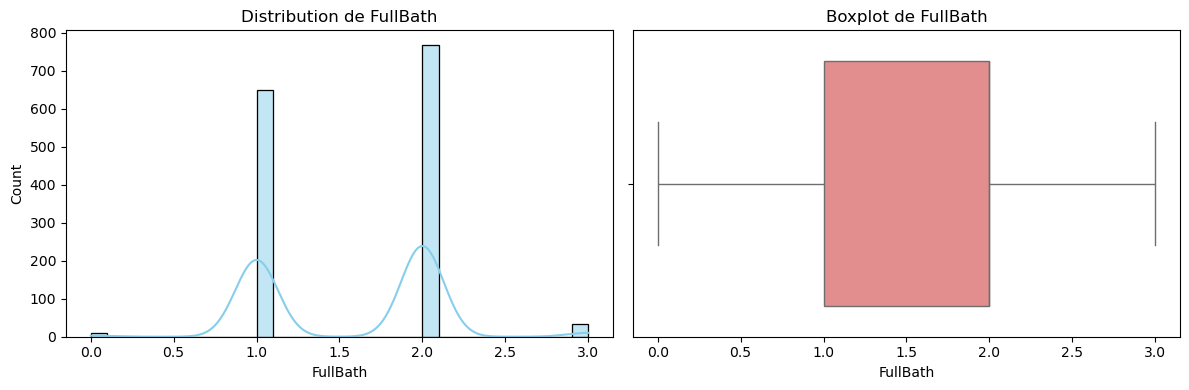

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  3
Moyenne :  1.5650684931506849
Ecart-type :  0.5509158012954318
Q1  1.0
Q2 :  2.0
Q3  2.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1.0
5%  1.0
95%  2.0
99%  3.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de FullBath : 0.037

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5606637627484438


In [44]:
analyse(X, 'FullBath', y)

## HalfBath

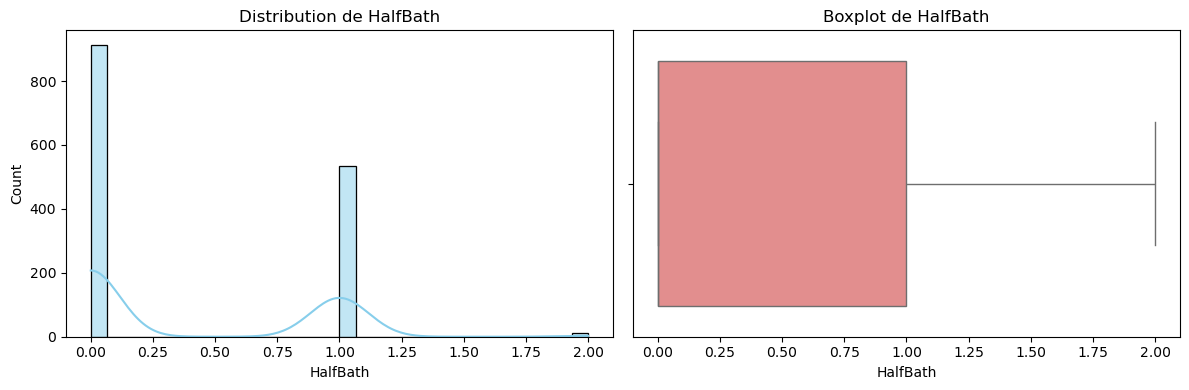

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2
Moyenne :  0.38287671232876713
Ecart-type :  0.5028853810928973
Q1  0.0
Q2 :  0.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de HalfBath : 0.675

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.2841076755947833


In [45]:
analyse(X, 'HalfBath', y)

## BsmtHalfBath

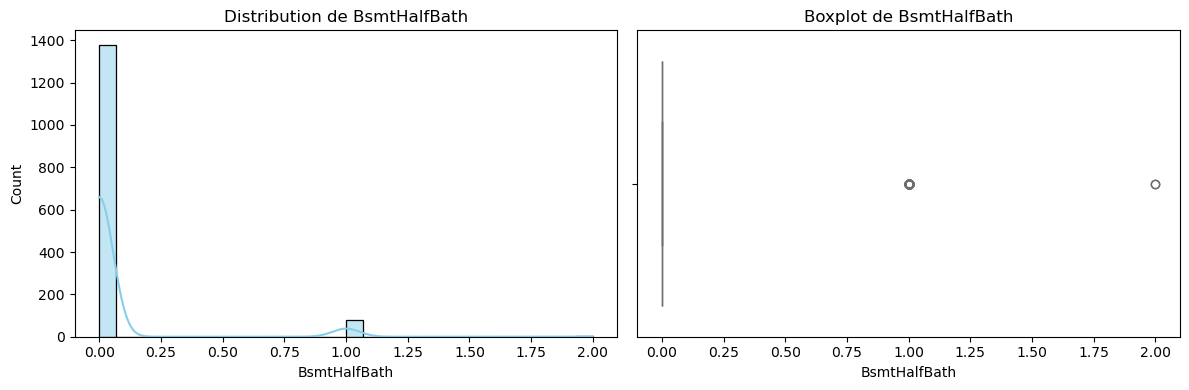

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2
Moyenne :  0.057534246575342465
Ecart-type :  0.23875264627920764
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtHalfBath : 4.099

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.016844154297359002


In [46]:
analyse(X, 'BsmtHalfBath', y)

## BsmtFullBath

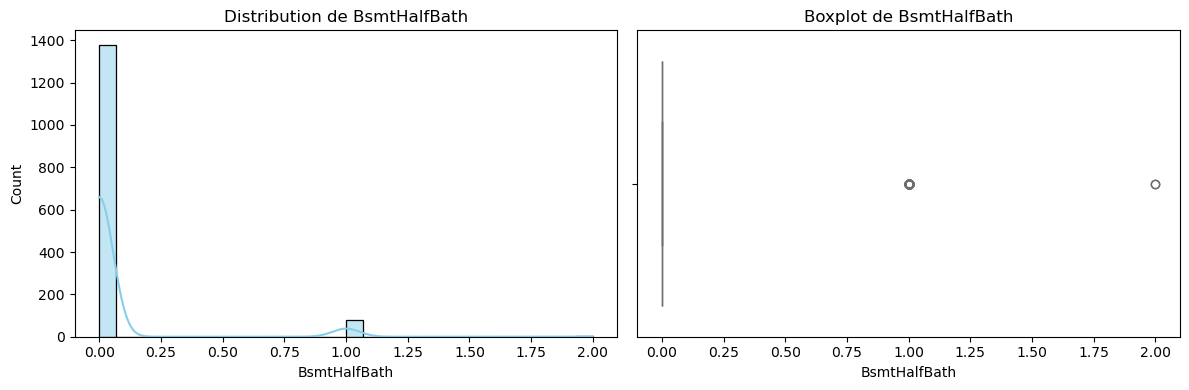

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  2
Moyenne :  0.057534246575342465
Ecart-type :  0.23875264627920764
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtHalfBath : 4.099

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.016844154297359002


In [47]:
analyse(X, 'BsmtHalfBath', y)

## BsmtFinSF1

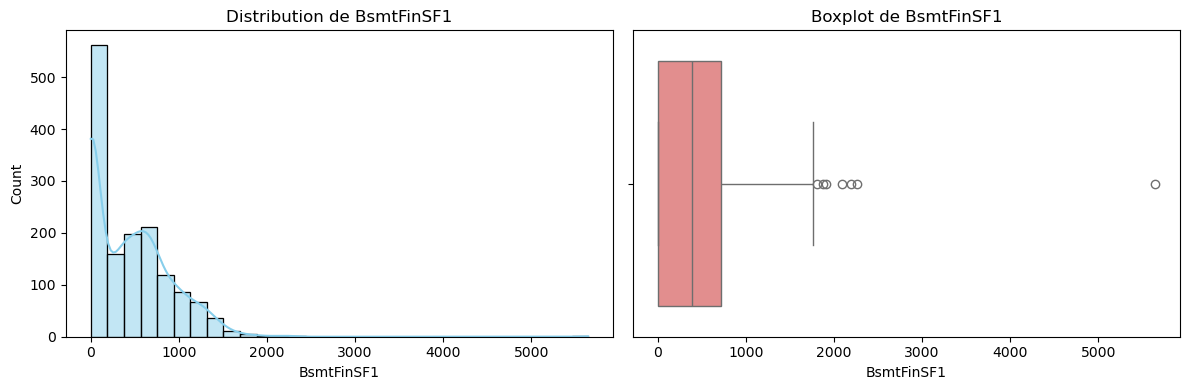

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  5644
Moyenne :  443.6397260273973
Ecart-type :  456.09809084092456
Q1  0.0
Q2 :  383.5
Q3  712.25
IQR  712.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1274.0
99%  1572.41

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtFinSF1 : 1.684

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.3864198062421531


In [48]:
analyse(X, 'BsmtFinSF1', y)

In [49]:
X['BsmtFinSF1_capped'] = X['BsmtFinSF1'].clip(upper=X['BsmtFinSF1'].quantile(0.99))

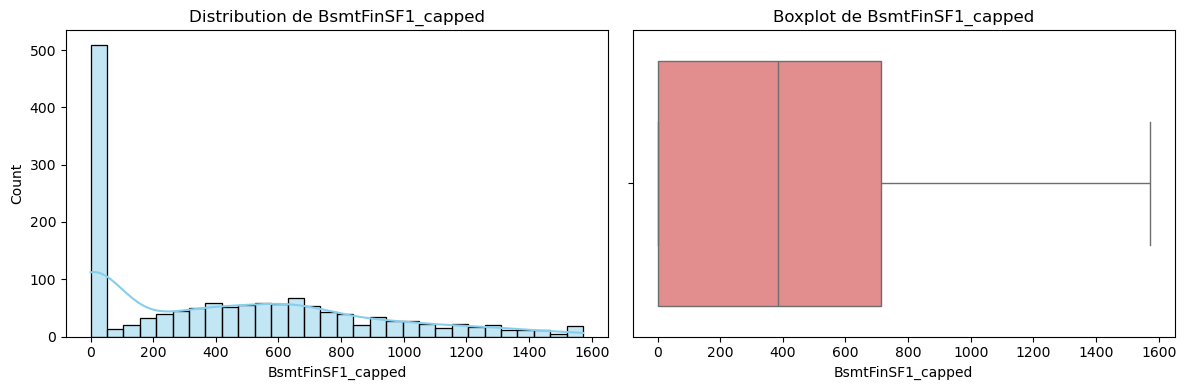

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  1572.41
Moyenne :  438.5302397260275
Ecart-type :  429.04920324473926
Q1  0.0
Q2 :  383.5
Q3  712.25
IQR  712.25

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1274.0
99%  1572.1681

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de BsmtFinSF1_capped : 0.687

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.3943403767905653


In [50]:
analyse(X, 'BsmtFinSF1_capped',y)

## LotArea

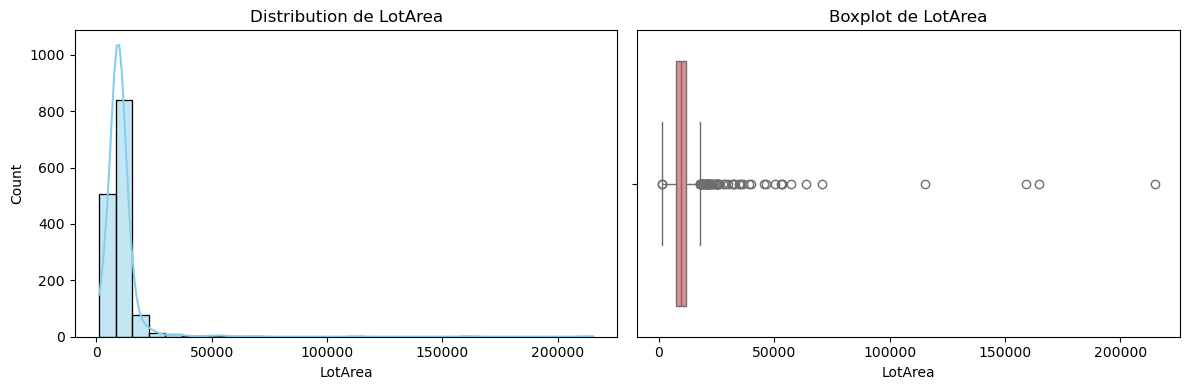

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1300
Max :  215245
Moyenne :  10516.828082191782
Ecart-type :  9981.264932379147
Q1  7553.5
Q2 :  9478.5
Q3  11601.5
IQR  4048.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1680.0
5%  3311.7000000000003
95%  17401.149999999998
99%  37567.64000000021

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de LotArea : 12.195

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.2638433538714056


In [51]:
analyse(X, 'LotArea', y)

In [52]:
X['LotArea_capped'] = X['LotArea'].clip(upper=X['LotArea'].quantile(0.95))

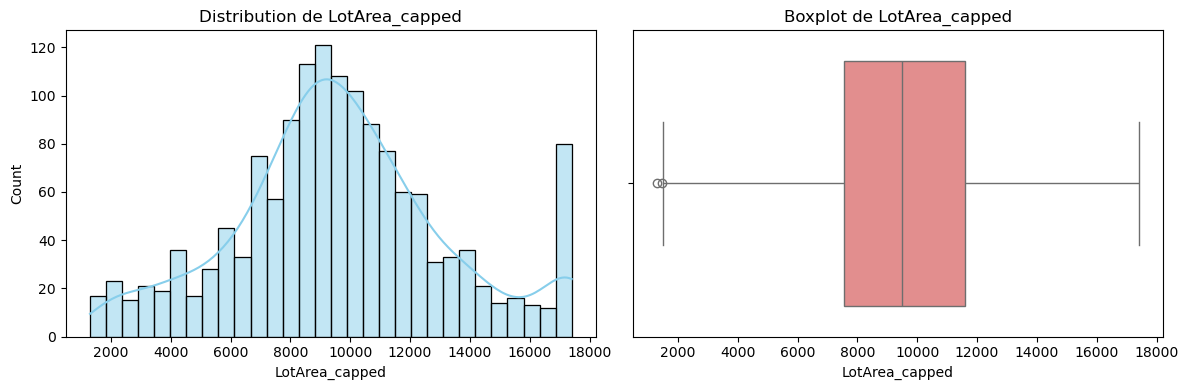

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  1300.0
Max :  17401.149999999998
Moyenne :  9634.192431506848
Ecart-type :  3565.813126747687
Q1  7553.5
Q2 :  9478.5
Q3  11601.5
IQR  4048.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  1680.0
5%  3311.7000000000003
95%  17400.0575
99%  17401.149999999998

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de LotArea_capped : 0.170

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.4329930480408719


In [53]:
analyse(X, 'LotArea_capped', y)

## YrSold

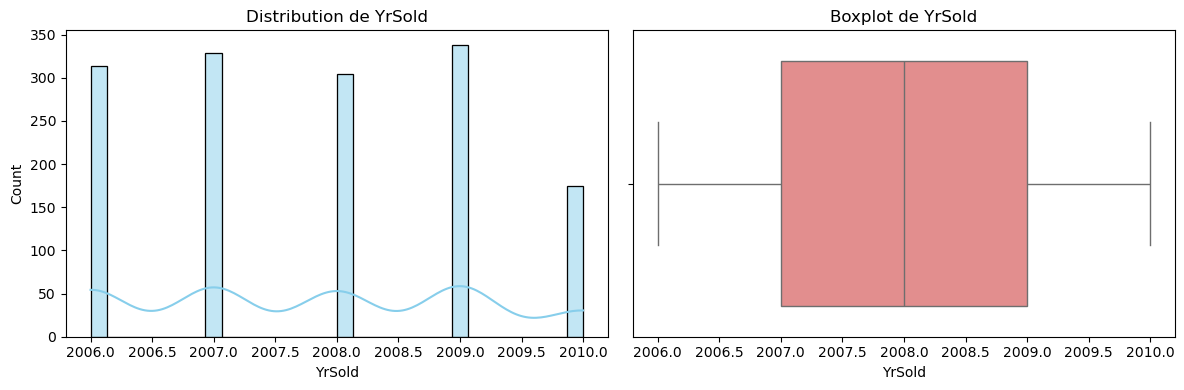

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  2006
Max :  2010
Moyenne :  2007.8157534246575
Ecart-type :  1.328095120552104
Q1  2007.0
Q2 :  2008.0
Q3  2009.0
IQR  2.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  2006.0
5%  2006.0
95%  2010.0
99%  2010.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de YrSold : 0.096

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.028922585168730402


In [54]:
analyse(X, 'YrSold', y)

## OpenPorchSF

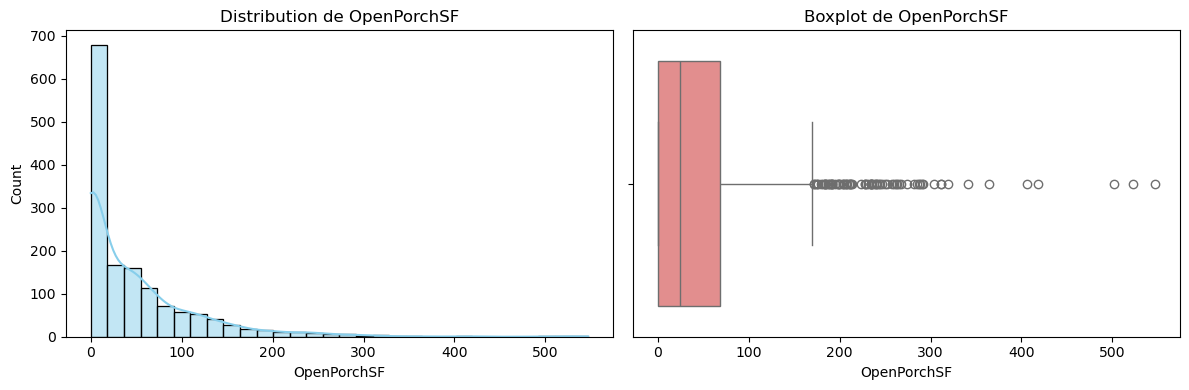

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  547
Moyenne :  46.66027397260274
Ecart-type :  66.25602767664974
Q1  0.0
Q2 :  25.0
Q3  68.0
IQR  68.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  175.04999999999995
99%  285.82000000000016

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de OpenPorchSF : 2.362

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.31585622711605554


In [55]:
analyse(X, 'OpenPorchSF', y)

In [56]:
X['OpenPorchSF_log'] = np.log1p(X['OpenPorchSF'])

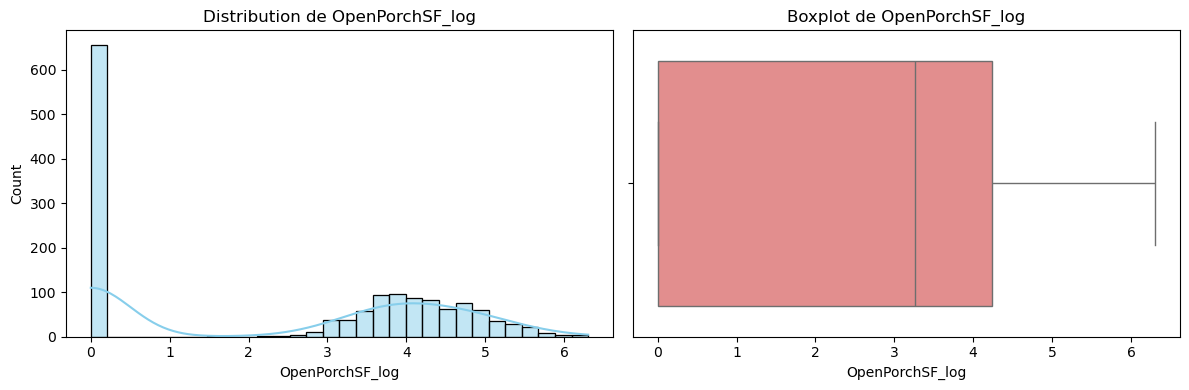

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  6.306275286948016
Moyenne :  2.3085408330706905
Ecart-type :  2.1523873381540004
Q1  0.0
Q2 :  3.258096538021482
Q3  4.23410650459726
IQR  4.23410650459726

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  5.170767281914935
99%  5.658848965239452

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de OpenPorchSF_log : -0.023

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.42997021300365396


In [57]:
analyse(X, 'OpenPorchSF_log', y)

In [58]:
X['has_OpenPorchSF'] = (X['OpenPorchSF_log'] > 0).astype(int)

## EnclosedPorch

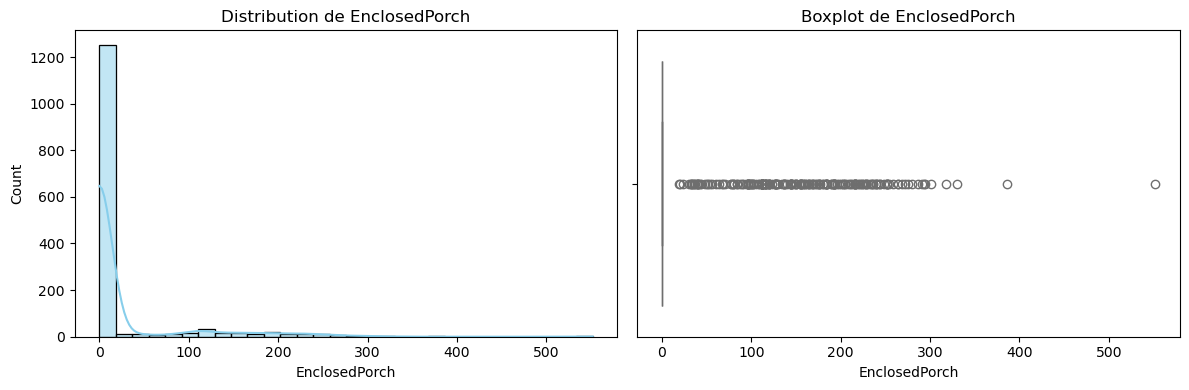

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  552
Moyenne :  21.954109589041096
Ecart-type :  61.11914860172879
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  180.14999999999986
99%  261.0500000000004

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de EnclosedPorch : 3.087

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.1285779579259565


In [59]:
analyse(X, 'EnclosedPorch', y)

## ScreenPorch

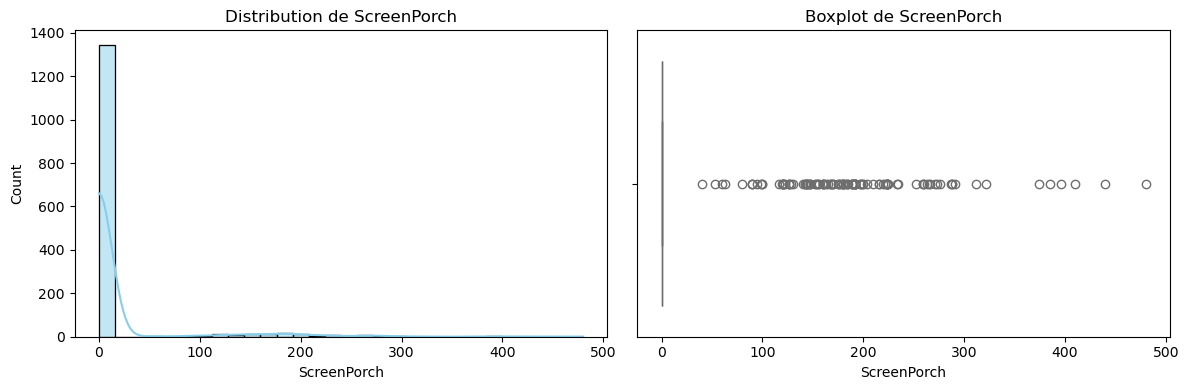

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  480
Moyenne :  15.060958904109588
Ecart-type :  55.757415281874486
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  160.0
99%  268.0500000000004

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de ScreenPorch : 4.118

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.11144657114291115


In [60]:
analyse(X, 'ScreenPorch', y)

## 3SsnPorch

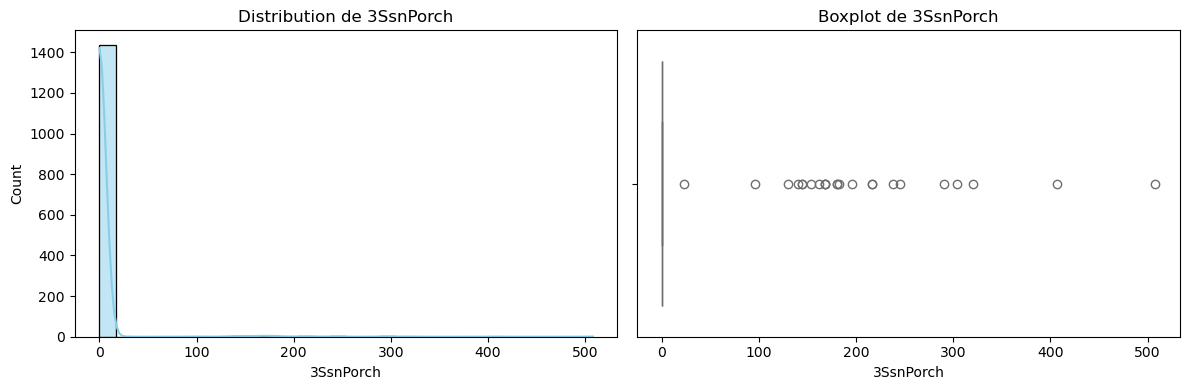

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  508
Moyenne :  3.4095890410958902
Ecart-type :  29.317330556782203
Q1  0.0
Q2 :  0.0
Q3  0.0
IQR  0.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  0.0
99%  168.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de 3SsnPorch : 10.294

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.04458366533574846


In [61]:
analyse(X, '3SsnPorch', y)

In [62]:
X['hasPorch'] = (
    (X['OpenPorchSF'] > 0) |
    (X['EnclosedPorch'] > 0) |
    (X['3SsnPorch'] > 0) |
    (X['ScreenPorch'] > 0)
).astype(int)

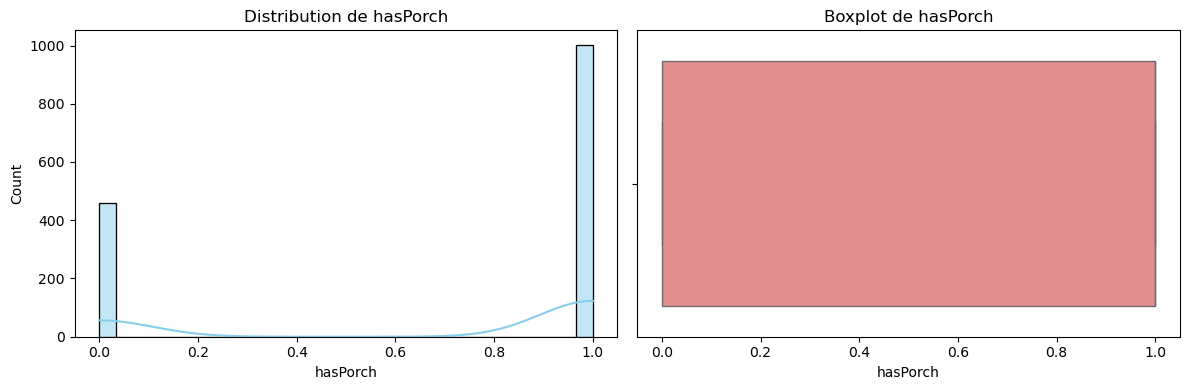

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1
Moyenne :  0.6863013698630137
Ecart-type :  0.46415445790511406
Q1  0.0
Q2 :  1.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de hasPorch : -0.803

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.2966779518921405


In [63]:
analyse(X, 'hasPorch', y)

## NbFloors

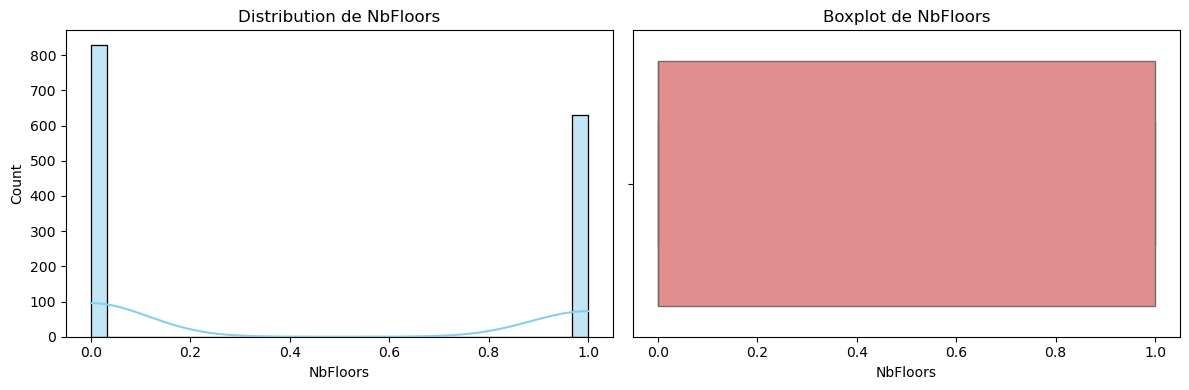

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1
Moyenne :  0.4321917808219178
Ecart-type :  0.49555044567561324
Q1  0.0
Q2 :  0.0
Q3  1.0
IQR  1.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  1.0
99%  1.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de NbFloors : 0.274

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.13765568369462602


In [64]:
analyse(X, 'NbFloors', y)

## TotalSF

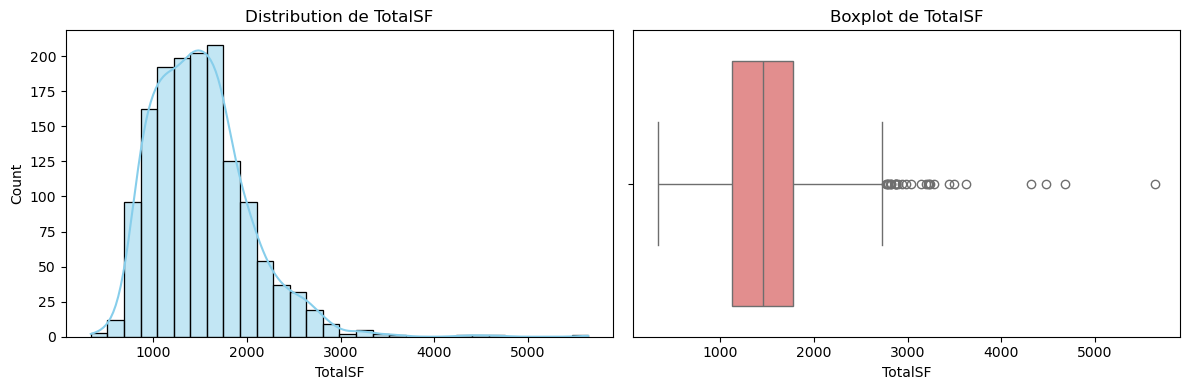

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  334
Max :  5642
Moyenne :  1509.6191780821919
Ecart-type :  521.1635228884062
Q1  1123.75
Q2 :  1458.0
Q3  1775.25
IQR  651.5

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  683.21
5%  848.0
95%  2462.2
99%  2958.5300000000025

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalSF : 1.329

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.7168830793692805


In [65]:
analyse(X, 'TotalSF', y)

In [66]:
X['TotalSF_log'] = np.log1p(X['TotalSF'])

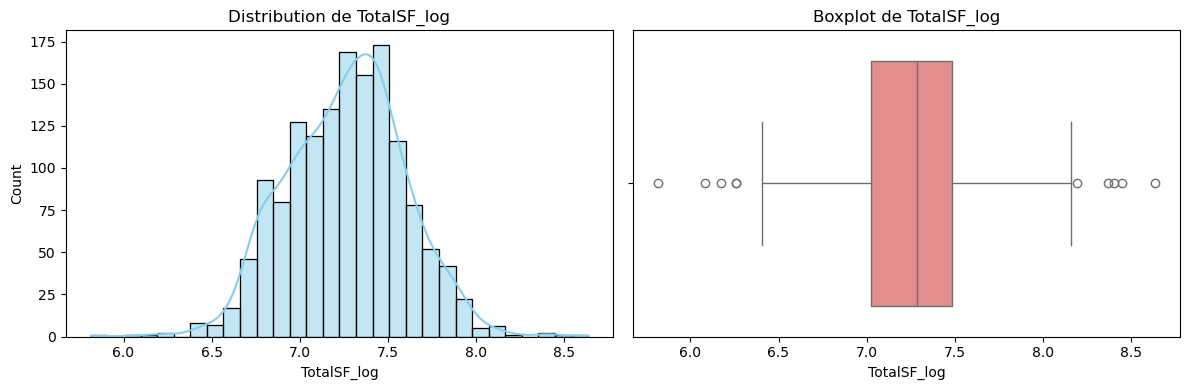

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  5.814130531825066
Max :  8.63817111796914
Moyenne :  7.264729442053215
Ecart-type :  0.3336122107964779
Q1  7.025315993592299
Q2 :  7.285506548522785
Q3  7.482259649702749
IQR  0.4569436561104503

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.528171298968763
5%  6.744059186311348
95%  7.809216534040979
99%  7.9927707328557664

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalSF_log : -0.034

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.7005684441204876


In [67]:
analyse(X, 'TotalSF_log', y)

In [68]:
X['TotalSF_log_capped'] = X['TotalSF_log'].clip(upper=X['TotalSF_log'].quantile(0.99), lower=X['TotalSF_log'].quantile(0.01))

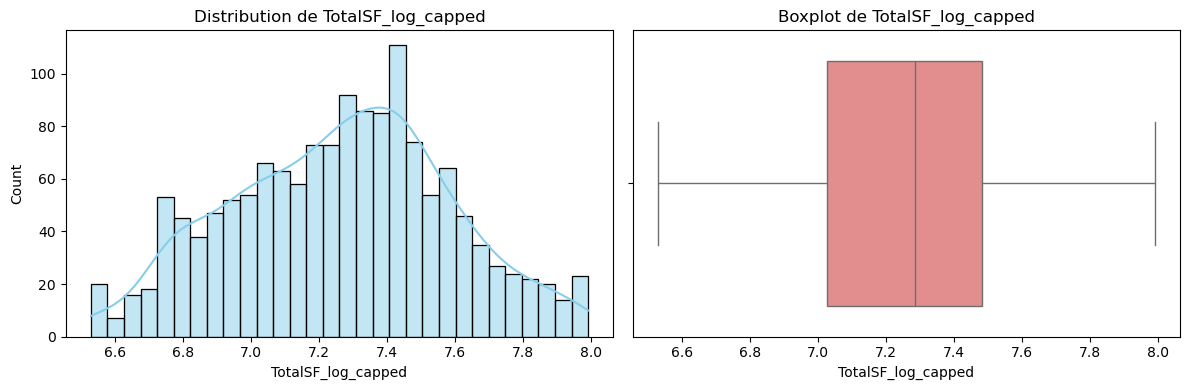

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  6.528171298968763
Max :  7.9927707328557664
Moyenne :  7.264624264049042
Ecart-type :  0.3226051438368335
Q1  7.025315993592299
Q2 :  7.285506548522785
Q3  7.482259649702749
IQR  0.4569436561104503

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  6.534905946391618
5%  6.744059186311348
95%  7.809216534040979
99%  7.990076122714184

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalSF_log_capped : -0.039

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.696581338415993


In [69]:
analyse(X, 'TotalSF_log_capped', y)

## Age

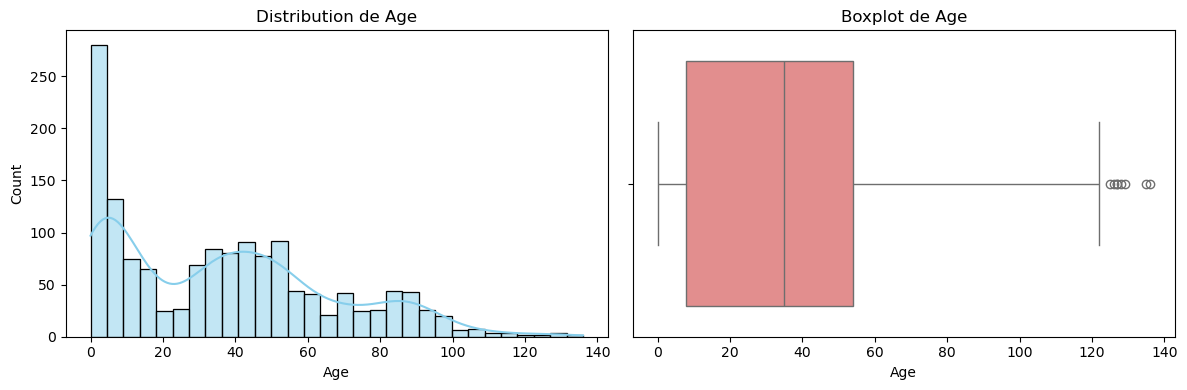

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  136
Moyenne :  36.54794520547945
Ecart-type :  30.250152445654646
Q1  8.0
Q2 :  35.0
Q3  54.0
IQR  46.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  1.0
95%  91.0
99%  110.41000000000008

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Age : 0.608

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.5233504175468159


In [70]:
analyse(X, 'Age', y)

In [71]:
X['Age_capped'] = X['Age'].clip(upper=X['Age'].quantile(0.95))

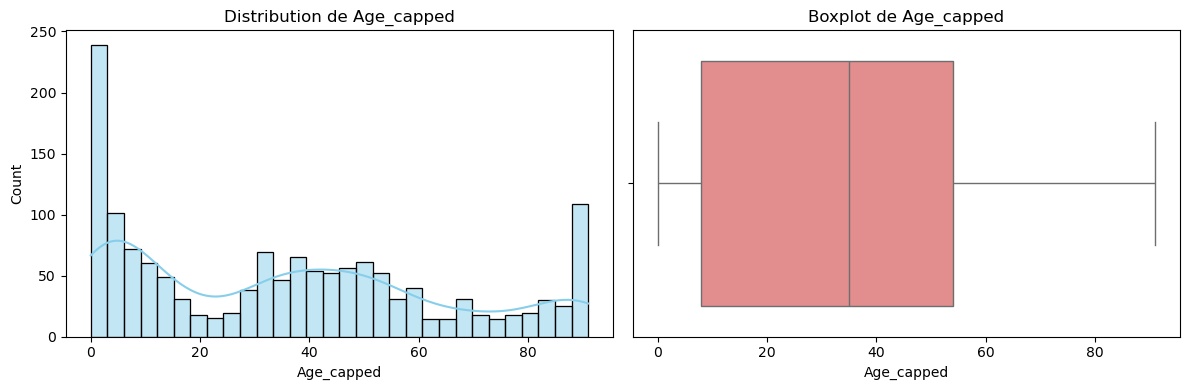

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  91
Moyenne :  35.94041095890411
Ecart-type :  28.883066652306074
Q1  8.0
Q2 :  35.0
Q3  54.0
IQR  46.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  1.0
95%  91.0
99%  91.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de Age_capped : 0.423

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  -0.5397824787104131


In [72]:
analyse(X, 'Age_capped',y)

## TotalPorchSF

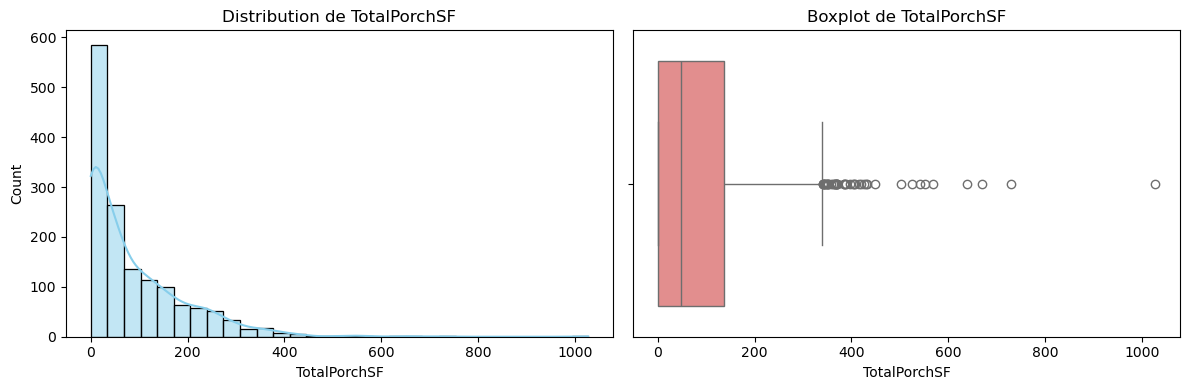

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  1027
Moyenne :  87.08493150684932
Ecart-type :  105.19036390431901
Q1  0.0
Q2 :  48.0
Q3  136.0
IQR  136.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  288.0
99%  410.69000000000074

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalPorchSF : 1.998

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.19573894078383539


In [73]:
analyse(X, 'TotalPorchSF', y)

In [74]:
X['TotalPorchSF_log'] = np.log1p(X['TotalPorchSF'])

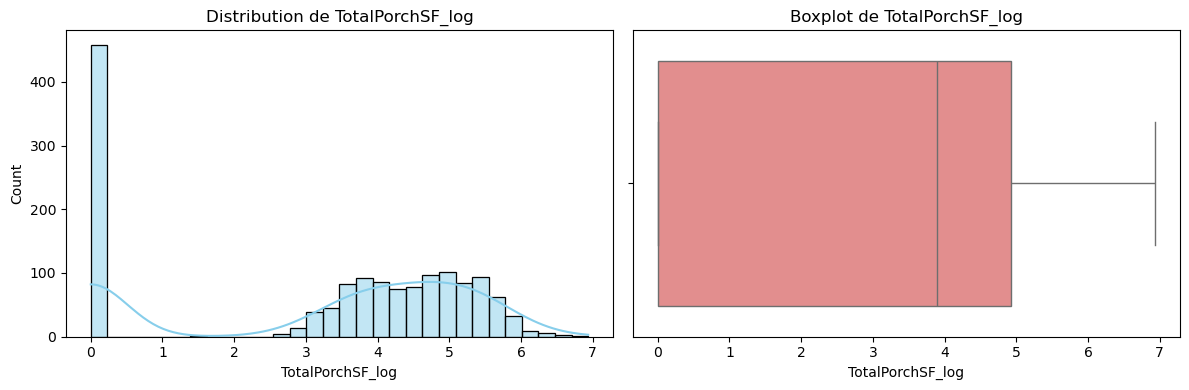

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0.0
Max :  6.93537044601511
Moyenne :  3.111856209605437
Ecart-type :  2.211744709357733
Q1  0.0
Q2 :  3.8918202981106265
Q3  4.919980925828125
IQR  4.919980925828125

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  5.666426688112432
99%  6.0202129838359655

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de TotalPorchSF_log : -0.513

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.28841995845004437


In [75]:
analyse(X, 'TotalPorchSF_log', y)

# Variables Qualitatives

In [76]:
variables_qualitatives.columns

Index(['FireplaceQu', 'KitchenQual', 'BsmtQual', 'Neighborhood', 'ExterQual',
       'HouseStyle', 'MSZoning'],
      dtype='object')

In [77]:
variables_qualitatives

FireplaceQu KitchenQual BsmtQual Neighborhood ExterQual HouseStyle  \
0            NaN          Gd       Gd      CollgCr        Gd     2Story   
1             TA          TA       Gd      Veenker        TA     1Story   
2             TA          Gd       Gd      CollgCr        Gd     2Story   
3             Gd          Gd       TA      Crawfor        TA     2Story   
4             TA          Gd       Gd      NoRidge        Gd     2Story   
...          ...         ...      ...          ...       ...        ...   
1455          TA          TA       Gd      Gilbert        TA     2Story   
1456          TA          TA       Gd       NWAmes        TA     1Story   
1457          Gd          Gd       TA      Crawfor        Ex     2Story   
1458         NaN          Gd       TA        NAmes        TA     1Story   
1459         NaN          TA       TA      Edwards        Gd     1Story   

     MSZoning  
0          RL  
1          RL  
2          RL  
3          RL  
4          RL  
...       ...  
1455       RL  
1456       RL  
1457       RL  
1458       RL  
1459       RL  

[1460 rows x 7 columns]

In [78]:
for col in variables_qualitatives:
    print(f"{col}:")
    print(X[col].unique())
    print("-" * 40)

FireplaceQu:
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
----------------------------------------
KitchenQual:
['Gd' 'TA' 'Ex' 'Fa']
----------------------------------------
BsmtQual:
['Gd' 'TA' 'Ex' nan 'Fa']
----------------------------------------
Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
----------------------------------------
ExterQual:
['Gd' 'TA' 'Ex' 'Fa']
----------------------------------------
HouseStyle:
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
----------------------------------------
MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------


## FireplaceQu

In [79]:
fireplace_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, np.nan: 0}
X['FireplaceQu_encoded'] = X['FireplaceQu'].map(fireplace_map)

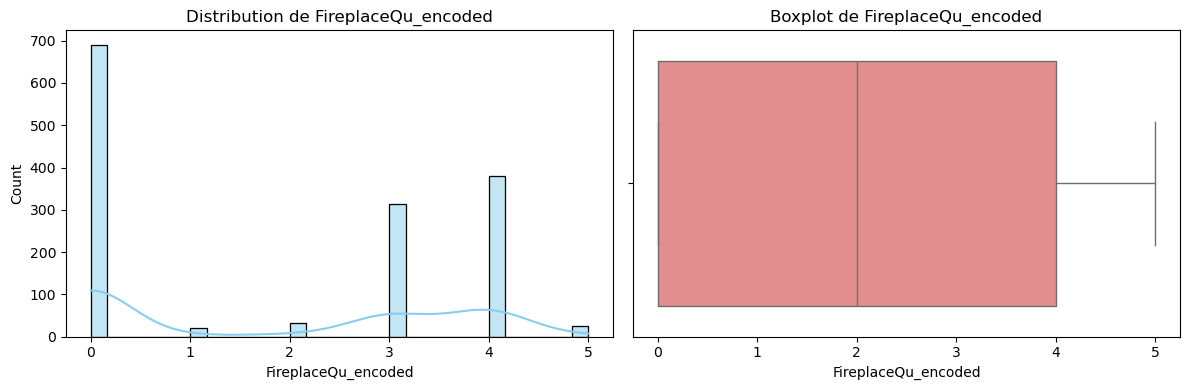

-------------------------------------
STATISTIQUES DESCRIPTIVES
-------------------------------------
Min :  0
Max :  5
Moyenne :  1.8253424657534247
Ecart-type :  1.8108768790622118
Q1  0.0
Q2 :  2.0
Q3  4.0
IQR  4.0

-------------------------------------
QUANTILES EXTREMES
-------------------------------------
1%  0.0
5%  0.0
95%  4.0
99%  5.0

-------------------------------------
ASYMETRIE
-------------------------------------
Skewness de FireplaceQu_encoded : 0.113

-------------------------------------
LIEN AVEC LA VARIABLE CIBLE
-------------------------------------
Correlation linéaire avec y:  0.5204376059504017


In [80]:
analyse(X, 'FireplaceQu_encoded', y)

## KitchenQual

In [81]:
kitchen_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
X['KitchenQual_encoded'] = X['KitchenQual'].map(kitchen_map)

## BsmtQual

In [82]:
bsmt_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4, np.nan: 0}
X['BsmtQual_encoded'] = X['BsmtQual'].map(bsmt_map)

## Neighborhood

In [83]:
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

In [84]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'FireplaceQu', 'FullBath', 'HalfBath', 'KitchenQual', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtQual', 'BsmtFinSF1', 'LotArea', 'ExterQual',
       'HouseStyle', 'GarageYrBlt', 'YrSold', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', '3SsnPorch', 'MSZoning', 'NbFloors', 'TotalSF', 'Age',
       'TotalBath', 'TotalPorchSF', 'GrLivArea_log', 'GrLivArea_log_capped',
       'GarageArea_capped', 'TotalBsmtSF_capped', '1stFlrSF_log',
       '1stFlrSF_log_capped', 'has_2ndFlr', 'Fireplaces_log',
       'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log',
       'has_OpenPorchSF', 'hasPorch', 'TotalSF_log', 'TotalSF_log_capped',
       'Age_capped', 'TotalPorchSF_log', 'FireplaceQu_encoded',
       'KitchenQual_encoded', 'BsmtQual_encoded', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neigh

## ExterQual

In [85]:
exter_map = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
X['ExterQual_encoded'] = X['ExterQual'].map(exter_map)

## HouseStyle

In [86]:
X = pd.get_dummies(X, columns=['HouseStyle'], drop_first=True)

## MSZoning

In [87]:
X = pd.get_dummies(X, columns=['MSZoning'], drop_first=True)

In [88]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces',
       'FireplaceQu', 'FullBath', 'HalfBath', 'KitchenQual', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtQual', 'BsmtFinSF1', 'LotArea', 'ExterQual',
       'GarageYrBlt', 'YrSold', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       '3SsnPorch', 'NbFloors', 'TotalSF', 'Age', 'TotalBath', 'TotalPorchSF',
       'GrLivArea_log', 'GrLivArea_log_capped', 'GarageArea_capped',
       'TotalBsmtSF_capped', '1stFlrSF_log', '1stFlrSF_log_capped',
       'has_2ndFlr', 'Fireplaces_log', 'BsmtFinSF1_capped', 'LotArea_capped',
       'OpenPorchSF_log', 'has_OpenPorchSF', 'hasPorch', 'TotalSF_log',
       'TotalSF_log_capped', 'Age_capped', 'TotalPorchSF_log',
       'FireplaceQu_encoded', 'KitchenQual_encoded', 'BsmtQual_encoded',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighbo

# Test d'hypothèse

In [89]:
df = X[['OverallQual', 'GrLivArea_log_capped', 'GarageCars', 'GarageArea_capped', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'Fireplaces_log', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log', 'hasPorch', 'NbFloors', 'TotalSF_log_capped',  'Age_capped', 'TotalPorchSF_log', 'FireplaceQu_encoded', 'KitchenQual_encoded', 'BsmtQual_encoded', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_encoded', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']]

In [90]:
df

OverallQual  GrLivArea_log_capped  GarageCars  GarageArea_capped  \
0               7              7.444833           2              548.0   
1               6              7.141245           2              460.0   
2               7              7.488294           2              608.0   
3               7              7.448916           3              642.0   
4               8              7.695758           3              836.0   
...           ...                   ...         ...                ...   
1455            6              7.407318           2              460.0   
1456            6              7.637234           2              500.0   
1457            7              7.758333           1              252.0   
1458            5              6.983790           1              240.0   
1459            5              7.136483           1              276.0   

      TotalBsmtSF_capped  1stFlrSF_log_capped  2ndFlrSF  YearBuilt  \
0                  856.0             6.753438       854       2003   
1                 1262.0             7.141245         0       1976   
2                  920.0             6.825460       866       2001   
3                  756.0             6.869014       756       1915   
4                 1145.0             7.044033      1053       2000   
...                  ...                  ...       ...        ...   
1455               953.0             6.860664       694       1999   
1456              1542.0             7.637234         0       1978   
1457              1152.0             7.080868      1152       1941   
1458              1078.0             6.983790         0       1950   
1459              1256.0             7.136483         0       1965   

      YearRemodAdd  Fireplaces_log  ...  HouseStyle_1Story  HouseStyle_2.5Fin  \
0             2003        0.000000  ...              False              False   
1             1976        0.693147  ...               True              False   
2             2002        0.693147  ...              False              False   
3             1970        0.693147  ...              False              False   
4             2000        0.693147  ...              False              False   
...            ...             ...  ...                ...                ...   
1455          2000        0.693147  ...              False              False   
1456          1988        1.098612  ...               True              False   
1457          2006        1.098612  ...              False              False   
1458          1996        0.000000  ...               True              False   
1459          1965        0.000000  ...               True              False   

      HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  \
0                 False               True              False   
1                 False              False              False   
2                 False               True              False   
3                 False               True              False   
4                 False               True              False   
...                 ...                ...                ...   
1455              False               True              False   
1456              False              False              False   
1457              False               True              False   
1458              False              False              False   
1459              False              False              False   

      HouseStyle_SLvl  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  
0               False        False        False         True        False  
1               False        False        False         True        False  
2               False        False        False         True        False  
3               False        False        False         True        False  
4               False        False        False         True        False  
...               ...          ...          ...          ...      

In [91]:
#Echantillonnage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [92]:
#Représentativité de l'échantillon
from scipy.stats import ks_2samp
for col in df.columns:

    stat, p_value = ks_2samp(X_train[col], df[col])
    decision = ""
    if(p_value > 0.05):
      decision = "H0 - acceptée"
    else:
      decision = "H0 - rejetée"

    print(f"{col} — p-value (KS): {p_value:.4f} - Décision: {decision}")

OverallQual — p-value (KS): 0.9863 - Décision: H0 - acceptée
GrLivArea_log_capped — p-value (KS): 0.9976 - Décision: H0 - acceptée
GarageCars — p-value (KS): 0.9953 - Décision: H0 - acceptée
GarageArea_capped — p-value (KS): 0.8379 - Décision: H0 - acceptée
TotalBsmtSF_capped — p-value (KS): 0.9998 - Décision: H0 - acceptée
1stFlrSF_log_capped — p-value (KS): 0.9597 - Décision: H0 - acceptée
2ndFlrSF — p-value (KS): 1.0000 - Décision: H0 - acceptée
YearBuilt — p-value (KS): 1.0000 - Décision: H0 - acceptée
YearRemodAdd — p-value (KS): 1.0000 - Décision: H0 - acceptée
Fireplaces_log — p-value (KS): 1.0000 - Décision: H0 - acceptée
FullBath — p-value (KS): 0.9999 - Décision: H0 - acceptée
HalfBath — p-value (KS): 1.0000 - Décision: H0 - acceptée
BsmtFinSF1_capped — p-value (KS): 1.0000 - Décision: H0 - acceptée
LotArea_capped — p-value (KS): 0.9471 - Décision: H0 - acceptée
OpenPorchSF_log — p-value (KS): 0.9613 - Décision: H0 - acceptée
hasPorch — p-value (KS): 1.0000 - Décision: H0 - a

# Multi-Collinéarité

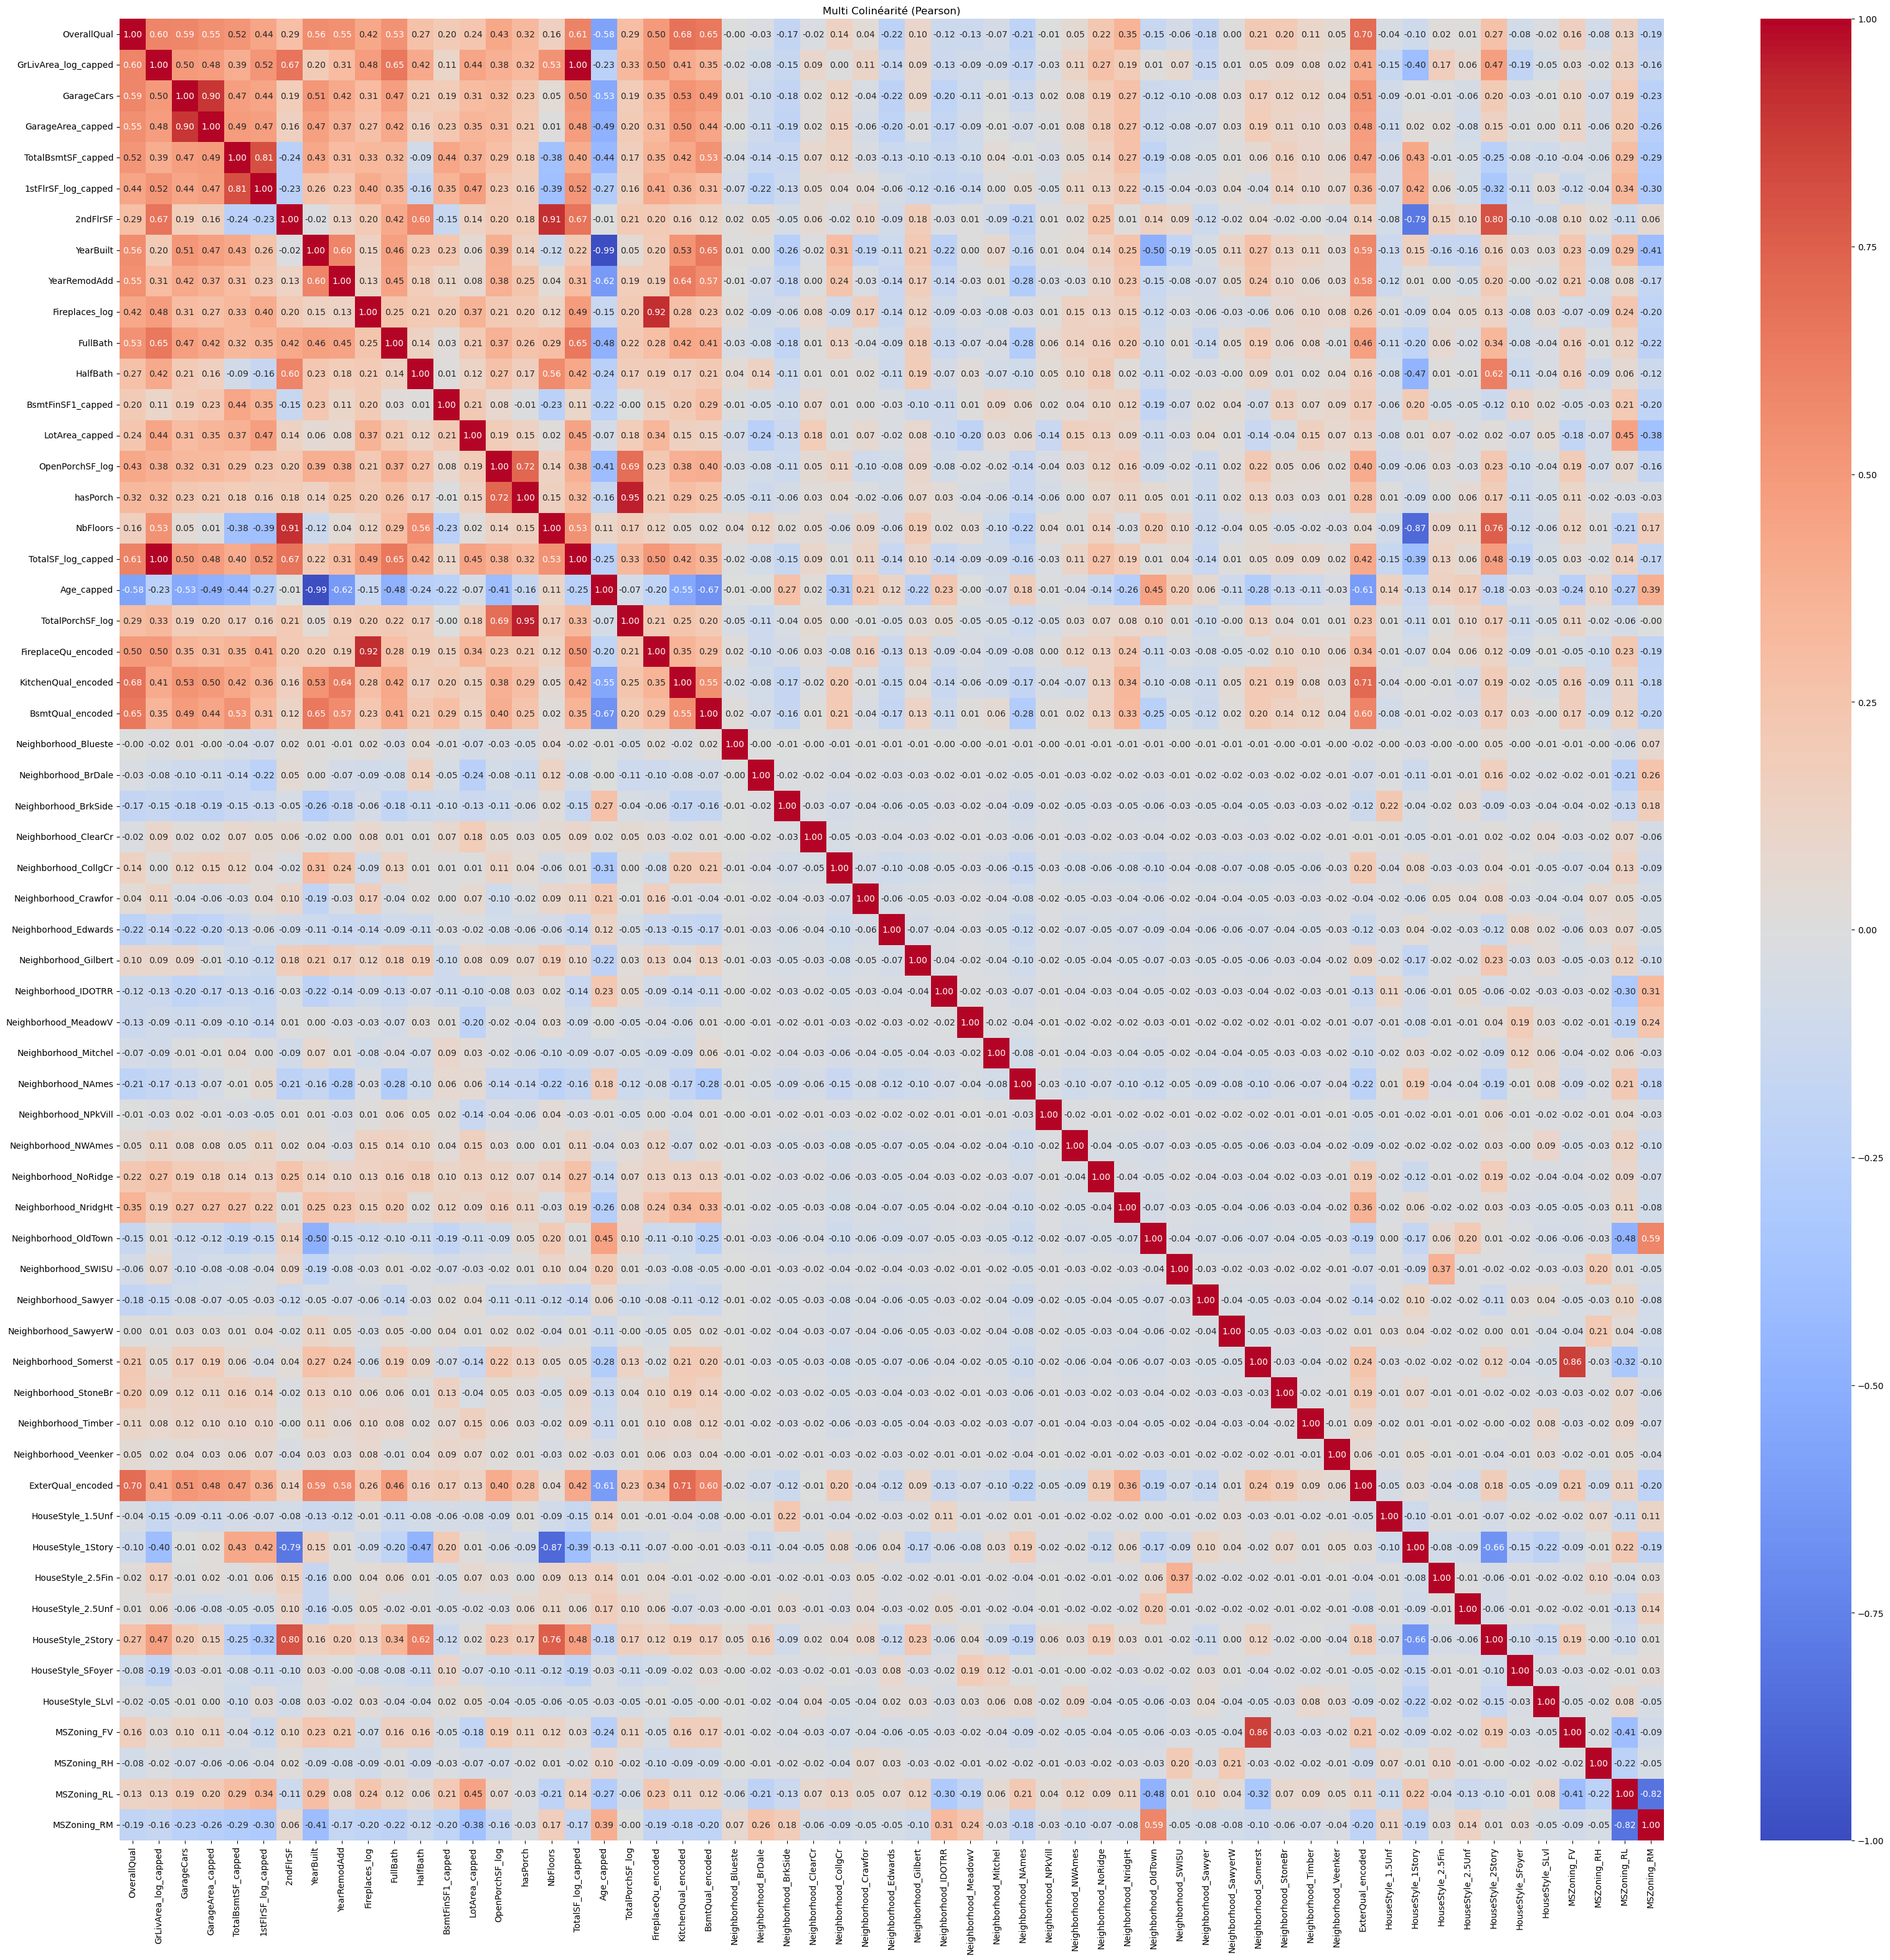

In [93]:
#Detection de la multicolinéarité
import numpy as np
corr_matrix = X_train.corr()
plt.figure(figsize=(40, 38))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Multi Colinéarité (Pearson)")
plt.show()

In [94]:
X_train = X_train.drop(['GarageArea_capped','NbFloors', 'GrLivArea_log_capped', 'TotalPorchSF_log', 'Fireplaces_log', 'Neighborhood_Somerst'], axis=1)
X_test = X_test.drop(['GarageArea_capped','NbFloors', 'GrLivArea_log_capped', 'TotalPorchSF_log', 'Fireplaces_log', 'Neighborhood_Somerst'], axis=1)

In [95]:
#Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]

# Modelisation

In [97]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()
print(results.params)

const    181312.692759
x1        16738.127250
x2         6379.013301
x3         3919.314509
x4        20538.054414
x5        31629.485355
x6        23760.811333
x7         3769.794748
x8         1566.413147
x9         1819.090454
x10       10737.423541
x11       11150.445824
x12        1170.776960
x13        -776.539201
x14       -9204.765225
x15       21184.039498
x16        2622.980907
x17        6233.224224
x18        3442.468314
x19         458.717737
x20        1796.945611
x21        1617.762808
x22         501.581692
x23       -1982.944688
x24        2448.132033
x25       -4006.946819
x26       -1481.990060
x27        1421.333967
x28         608.580096
x29       -2905.388547
x30       -4820.570591
x31         -27.289455
x32       -4080.296294
x33        5941.228102
x34        6964.431822
x35        -673.630076
x36       -1639.877698
x37       -3017.635486
x38       -2981.891521
x39        5429.742129
x40         -76.366351
x41        1203.900532
x42        4377.106935
x43        

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        12:01:09   Log-Likelihood:                -11987.
No. Observations:                1022   AIC:                         2.408e+04
Df Residuals:                     968   BIC:                         2.435e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.813e+05    965.740    187.745      0.000    1.79e+05    1.83e+05
x1          1.674e+04   1941.823      8.620      0.000    1.29e+04    2.05e+04
x2          6379.0133   1411.919      4.518      0.000    3608.239    9149.787
x3          3919.3145   2192.487      1.788      0.074    -383.261    8221.890
x4          2.054e+04   4027.715      5.099      0.000    1.26e+04    2.84e+04
x5          3.163e+04   3763.906      8.403      0.000    2.42e+04     3.9e+04
x6          2.376e+04   9036.441      2.629      0.009    6027.539    4.15e+04
x7          3769.7947   1502.033      2.510      0.012     822.179    6717.411
x8          1566.4131   1689.190      0.927      0.354   -1748.483    4881.309
x9          1819.0905   1519.398      1.197      0.232   -1162.603    4800.784
x10         1.074e+04   1170.179      9.176      0.000    8441.044     1.3e+04
x11         1.115e+04   1440.042      7.743      0.000    8324.482     1.4e+04
x12         1170.7770   1633.589      0.717      0.474   -2035.008    4376.562
x13         -776.5392   1511.263     -0.514      0.607   -3742.268    2189.190
x14        -9204.7652   4840.581     -1.902      0.058   -1.87e+04     294.477
x15         2.118e+04   9465.525      2.238      0.025    2608.725    3.98e+04
x16         2622.9809   1290.064      2.033      0.042      91.337    5154.625
x17         6233.2242   1659.341      3.756      0.000    2976.904    9489.544
x18         3442.4683   1705.753      2.018      0.044      95.068    6789.869
x19          458.7177   1013.662      0.453      0.651   -1530.510    2447.945
x20         1796.9456   1434.863      1.252      0.211   -1018.854    4612.745
x21         1617.7628   2021.684      0.800      0.424   -2349.626    5585.152
x22          501.5817   1415.691      0.354      0.723   -2276.595    3279.759
x23        -1982.9447   2174.334     -0.912      0.362   -6249.897    2284.008
x24         2448.1320   1809.025      1.353      0.176   -1101.931    5998.195
x25        -4006.9468   2238.413     -1.790      0.074   -8399.648     385.754
x26        -1481.9901   1769.885     -0.837      0.403   -4955.244    1991.264
x27         1421.3340   1904.194      0.746      0.456   -2315.490    5158.158
x28          608.5801   1369.629      0.444      0.657   -2079.205    3296.365
x29        -2905.3885   1595.860     -1.821      0.069   -6037.133     226.356
x30        -4820.5706   2847.322     -1.693      0.091   -1.04e+04     767.065
x31          -27.2895   1121.132     -0.024      0.981   -2227.418    2172.839
x32        -4080.2963   1847.372     -2.209      0.027   -7705.613    -454.980
x33         5941.2281   1492.594      3.980      0.000    3012.136    8870.320
x34         6964.4318   1648.112      4.226      0.000    3730.148    1.02e+04
x35         -673.6301   2973.469     -0.227      0.821   -6508.819    5161.559
x3

# Evaluation du modèle

In [99]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import jarque_bera
from scipy.stats import shapiro
from scipy.stats import normaltest, anderson
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import warnings
warnings.filterwarnings("ignore")


#-------------------------------------------------------------------
# ATTENTION X_TRAIN et X_TEST ne doivent pas avoir de constante
#-------------------------------------------------------------------


def eval_modele_regression_lineaire(X_train,X_test, y_train, y_test, beta_hat):

  X_train = np.c_[np.ones(X_train.shape[0]), X_train]
  X_test = np.c_[np.ones(X_test.shape[0]), X_test]
  y_pred = np.dot(X_test, beta_hat)
  residuals = np.array(y_test - y_pred, dtype=float)


  print("..... Calcul des résidus : [Ok]")

  print("")
  print("--------------------------------")
  print("HYPOTHESES SUR LES RESIDUS")
  print("--------------------------------")

  #H1: Homoscédasticité des résidus
  bp_test = het_breuschpagan(residuals, X_test)
  labels = ["LM Statistic", "LM p-value", "F-statistic", "F p-value"]
  results = dict(zip(labels, bp_test))
  p_value = results["F p-value"]  # ou "LM p-value", les deux sont acceptés
  if p_value < 0.05:
      print(f"..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value {p_value}] [KO !!!]")
  else:
      print(f"..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value {p_value}] [Ok]")

  #H2: Indépendances des résidus
  dw_stat = durbin_watson(residuals)

  if 1.5 <= dw_stat <= 2.5:
      print(f"..... Indépendance des résidus (test de Durbin Watson) :[valeur {dw_stat}] [OK]")
  elif dw_stat < 1.5:
      print(f"..... Indépendance des résidus (test de Durbin Watson) :[valeur {dw_stat}] [KO !!!]")
  elif dw_stat > 2.5:
      print(f"..... Indépendance des résidus (test de Durbin Watson) :[valeur {dw_stat}] [KO !!!]")

  #H3: Normalité des résidus
  jb_stat, jb_pvalue = jarque_bera(residuals)
  if jb_pvalue < 0.05:
      print(f"..... Normalité des résidus (test de Jarcque Bera) :[p_value {jb_pvalue}] [KO !!!]")
  else:
      print(f"..... Normalité des résidus (test de Jarcque Bera) :[p_value {jb_pvalue}] [OK]")

  shapiro_stat, shapiro_pvalue = shapiro(residuals)
  if shapiro_pvalue < 0.05:
      print(f"..... Normalité des résidus (test de Shapiro Wilk) :[p_value {shapiro_pvalue}] [KO !!!]")
  else:
      print(f"..... Normalité des résidus (test de Shapiro Wilk) :[p_value {shapiro_pvalue}] [OK]")


  result = anderson(residuals, dist='norm')
  if result.statistic > result.critical_values[2]:  # seuil à 5%
      print(f"..... Normalité des résidus (test d'Anderson Darling) : [KO !!!]")
  else:
      print(f"..... Normalité des résidus (test d'Anderson Darling) : [OK]")


  print("")
  print("--------------------------------------------")
  print("SIGNIFICATIVITE DES COEFFICIENTS" )
  print(" > Interprétable si normalité des résidus")
  print("--------------------------------------------")

  model = sm.OLS(y_train, X_train).fit()

  #Test de significativité de chacun des coefficients
  alpha = 0.05
  for i, (param, pval) in enumerate(zip(model.params, model.pvalues)):
      if pval < alpha:
          print(f"..... Coefficient {i}: valeur = {param:.4f}, p-value = {pval:.4f} : Coefficient significatif [OK]")
      else:
          print(f"..... Coefficient {i}: valeur = {param:.4f}, p-value = {pval:.4f} : Coefficient non significatif [KO !!!]")


  #Test global de fisher
  print("")
  f_stat = model.fvalue
  f_pval = model.f_pvalue
  alpha = 0.05
  if f_pval < alpha:
      print(f"..... Significativité globale du modèle (test global de Fisher) : [OK]")
  else:
      print(f"..... Significativité globale du modèle (test global de Fisher) : [KO !!!]")


  print("")
  print("--------------------------------")
  print("MESURES DE PERFORMANCES")
  print("--------------------------------")

  # MAE
  mae = mean_absolute_error(y_test, y_pred)

  # MSE
  mse = mean_squared_error(y_test, y_pred)

  # RMSE
  rmse = np.sqrt(mse)

  # R²
  r2 = r2_score(y_test, y_pred)

  # R² ajusté
  n = len(y_test)          # nombre d'observations
  p = X.shape[1]           # nombre de variables explicatives

  r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

  print(f"..... MAE  (Mean Absolute Error)        : {mae:.4f}")
  print(f"..... MSE  (Mean Squared Error)         : {mse:.4f}")
  print(f"..... RMSE (Root Mean Squared Error)    : {rmse:.4f}")
  print(f"..... R²   (Coefficient de détermination): {r2:.4f}")
  print(f"..... R² ajusté : {r2_adj}")

  print("")
  print("--------------------------------")
  print("COMPLEXITE DU MODELE")
  print("--------------------------------")

  # AIC
  aic = model.aic
  print(f"..... AIC (Akaike Information Criterion) : {aic:.4f}")

  # BIC
  bic = model.bic
  print(f"..... BIC (Bayesian Information Criterion) : {bic:.4f}")




In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
beta_hat = results.params.tolist()
eval_modele_regression_lineaire(X_train_scaled,X_test_scaled,y_train,y_test,beta_hat)

..... Calcul des résidus : [Ok]

--------------------------------
HYPOTHESES SUR LES RESIDUS
--------------------------------
..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value 4.450538813319907e-08] [KO !!!]
..... Indépendance des résidus (test de Durbin Watson) :[valeur 1.99688243258901] [OK]
..... Normalité des résidus (test de Jarcque Bera) :[p_value 0.0] [KO !!!]
..... Normalité des résidus (test de Shapiro Wilk) :[p_value 2.600005335532105e-22] [KO !!!]
..... Normalité des résidus (test d'Anderson Darling) : [KO !!!]

--------------------------------------------
SIGNIFICATIVITE DES COEFFICIENTS
 > Interprétable si normalité des résidus
--------------------------------------------
..... Coefficient 0: valeur = 181312.6928, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 1: valeur = 16738.1273, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 2: valeur = 6379.0133, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficie

# DETECTION DE LA MULTICOLINEARITE (VIF)

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(X):
    """Calcule les VIFs pour chaque variable explicative dans X."""
    vif_data = pd.DataFrame()
    vif_data["variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [102]:
def vif_selection(X, threshold=10.0, verbose=True):
    """
    Supprime itérativement les variables dont le VIF est supérieur au seuil donné.
    Affiche les logs à chaque étape.
    """
    X = X.copy()  # pour ne pas modifier le X d'origine
    iteration = 1

    # Convertir les booléens en float (True → 1.0, False → 0.0)
    X = X.astype({col: float for col in X.select_dtypes(include='bool').columns})

    if "const" not in X.columns:
        X = sm.add_constant(X)

    while True:
        vif_df = compute_vif(X.drop(columns='const'))  # on ne calcule pas le VIF de la constante
        max_vif = vif_df["VIF"].max()
        max_var = vif_df.loc[vif_df["VIF"].idxmax(), "variable"]

        if verbose:
            print(f"\n--- Itération {iteration} ---")
            print("VIFs calculés :")
            print(vif_df.sort_values("VIF").to_string(index=False))

        if max_vif > threshold:
            if verbose:
                print(f"Variable supprimée : '{max_var}' (VIF = {max_vif:.2f} > seuil {threshold})")
            X = X.drop(columns=max_var)
            iteration += 1
        else:
            if verbose:
                print("Aucune variable au-dessus du seuil. Arrêt du processus de sélection.")
            break

    selected_vars = list(X.drop(columns='const').columns)
    return selected_vars

In [103]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
vif_selection(X_train_scaled)


--- Itération 1 ---
VIFs calculés :
            variable       VIF
Neighborhood_Blueste  1.101705
   HouseStyle_2.5Unf  1.205078
Neighborhood_NPkVill  1.347697
   HouseStyle_2.5Fin  1.369906
Neighborhood_Veenker  1.401058
   HouseStyle_1.5Unf  1.412992
   BsmtFinSF1_capped  1.468195
 FireplaceQu_encoded  1.784438
   HouseStyle_SFoyer  1.789673
Neighborhood_StoneBr  1.806875
Neighborhood_MeadowV  2.011339
     HouseStyle_SLvl  2.117126
          GarageCars  2.137462
Neighborhood_ClearCr  2.148900
 Neighborhood_Timber  2.207467
 Neighborhood_BrDale  2.207495
      LotArea_capped  2.223461
Neighborhood_NoRidge  2.388704
        YearRemodAdd  2.419012
            hasPorch  2.448833
  Neighborhood_SWISU  2.466810
            HalfBath  2.475268
Neighborhood_SawyerW  2.717209
Neighborhood_Mitchel  2.730668
     OpenPorchSF_log  2.861310
Neighborhood_NridgHt  2.912410
 KitchenQual_encoded  2.952232
            FullBath  3.059399
   ExterQual_encoded  3.070953
    BsmtQual_encoded  3.119691
Ne

['OverallQual',
 'GarageCars',
 'TotalBsmtSF_capped',
 '1stFlrSF_log_capped',
 '2ndFlrSF',
 'YearBuilt',
 'YearRemodAdd',
 'FullBath',
 'HalfBath',
 'BsmtFinSF1_capped',
 'LotArea_capped',
 'OpenPorchSF_log',
 'hasPorch',
 'FireplaceQu_encoded',
 'KitchenQual_encoded',
 'BsmtQual_encoded',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'ExterQual_encoded',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyl

In [104]:
selected_features = ['OverallQual',
 'GarageCars',
 'TotalBsmtSF_capped',
 '1stFlrSF_log_capped',
 '2ndFlrSF',
 'YearBuilt',
 'YearRemodAdd',
 'FullBath',
 'HalfBath',
 'BsmtFinSF1_capped',
 'LotArea_capped',
 'OpenPorchSF_log',
 'hasPorch',
 'FireplaceQu_encoded',
 'KitchenQual_encoded',
 'BsmtQual_encoded',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'ExterQual_encoded',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RM']
X_train_reduced = X_train_scaled[selected_features]

In [105]:
# Ajout de la constante (meilleure méthode)
X_train_reduced_fit = sm.add_constant(X_train_reduced)

# Conversion explicite en float64 (élimine les types 'object')
X_train_reduced_fit = X_train_reduced_fit.astype(float)

# Pareil pour y_train si nécessaire
y_train = y_train.astype(float)

# Ajustement du modèle
model = sm.OLS(y_train, X_train_reduced_fit)
results = model.fit()

In [106]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        12:01:10   Log-Likelihood:                -11994.
No. Observations:                1022   AIC:                         2.409e+04
Df Residuals:                     971   BIC:                         2.434e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.813e+05    970.096    186.902      0.000    1.79e+05    1.83e+05
OverallQual            1.67e+04   1941.893      8.598      0.000    1.29e+04    2.05e+04
GarageCars            6242.9880   1417.480      4.404      0.000    3461.310    9024.666
TotalBsmtSF_capped    3635.3245   2198.934      1.653      0.099    -679.886    7950.535
1stFlrSF_log_capped   1.358e+04   2200.079      6.172      0.000    9262.026    1.79e+04
2ndFlrSF              2.648e+04   2912.211      9.093      0.000    2.08e+04    3.22e+04
YearBuilt             4231.0727   2581.395      1.639      0.102    -834.683    9296.828
YearRemodAdd          3194.6292   1493.577      2.139      0.033     263.619    6125.640
FullBath               874.2940   1657.630      0.527      0.598   -2378.656    4127.244
HalfBath              1502.0289   1511.608      0.994      0.321   -1464.367    4468.425
BsmtFinSF1_capped     1.079e+04   1170.114      9.219      0.000    8490.911    1.31e+04
LotArea_capped        1.127e+04   1443.475      7.811      0.000    8442.280    1.41e+04
OpenPorchSF_log        878.2832   1634.559      0.537      0.591   -2329.391    4085.958
hasPorch              -976.5203   1508.372     -0.647      0.518   -3936.565    1983.524
FireplaceQu_encoded   2613.3707   1286.141      2.032      0.042      89.436    5137.306
KitchenQual_encoded   6434.7141   1665.438      3.864      0.000    3166.442    9702.986
BsmtQual_encoded      3523.6129   1705.474      2.066      0.039     176.774    6870.452
Neighborhood_Blueste   320.0877   1014.106      0.316      0.752   -1670.004    2310.180
Neighborhood_BrDale   1548.1823   1425.818      1.086      0.278   -1249.857    4346.222
Neighborhood_BrkSide  2300.3031   1989.718      1.156      0.248   -1604.339    6204.945
Neighborhood_ClearCr   775.8795   1411.694      0.550      0.583   -1994.442    3546.201
Neighborhood_CollgCr -1729.7786   2181.540     -0.793      0.428   -6010.855    2551.297
Neighborhood_Crawfor  3213.6891   1771.939      1.814      0.070    -263.582    6690.960
Neighborhood_Edwards -3360.0179   2230.975     -1.506      0.132   -7738.105    1018.069
Neighborhood_Gilbert -1525.6447   1776.974     -0.859      0.391   -5012.797    1961.507
Neighborhood_IDOTRR   1236.7449   1816.982      0.681      0.496   -2328.918    4802.408
Neighborhood_MeadowV   574.9502   1362.816      0.422      0.673   -2099.455    3249.355
Neighborhood_Mitchel -2683.1672   1600.173     -1.677      0.094   -5823.363     457.028
Neighborhood_NAmes   -3876.2925   2824.340     -1.372      0.170   -9418.805    1666.221
Neighborhood_NPkVill   206.1089   1123.629      0.183      0.854   -1998.912    2411.130
Neighborhood_NWAmes  -3698.6955   1842.775     -2.007      0.045   -7314.976     -82.415
Neighborhood_NoRidge  6452.6353   1489.190      4.333    

In [107]:
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]
X_train_reduced = X_train_reduced.astype(float)
X_test_reduced = X_test_reduced.astype(float)
beta_hat = results.params.tolist()
eval_modele_regression_lineaire(X_train_reduced,X_test_reduced,y_train,y_test,beta_hat)

..... Calcul des résidus : [Ok]

--------------------------------
HYPOTHESES SUR LES RESIDUS
--------------------------------
..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value 2.2187185835114596e-298] [KO !!!]
..... Indépendance des résidus (test de Durbin Watson) :[valeur 0.17662124860263154] [KO !!!]
..... Normalité des résidus (test de Jarcque Bera) :[p_value 0.007089960065517586] [KO !!!]
..... Normalité des résidus (test de Shapiro Wilk) :[p_value 0.0004923445949095817] [KO !!!]
..... Normalité des résidus (test d'Anderson Darling) : [KO !!!]

--------------------------------------------
SIGNIFICATIVITE DES COEFFICIENTS
 > Interprétable si normalité des résidus
--------------------------------------------
..... Coefficient 0: valeur = -929278.7439, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 1: valeur = 12180.9007, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 2: valeur = 8547.4368, p-value = 0.0000 : Coefficient signif

# Methodes de selection automatique

In [108]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def forward_selection(X, y, criterion='aic', verbose=True):
    remaining_vars = list(X.columns)
    selected_vars = []
    history = []
    current_score = float('inf')
    best_new_score = None

    iteration = 1
    while remaining_vars:
        scores_with_candidates = []
        if verbose:
            if best_new_score is not None:
              print(f"\nÉtape {iteration} - (Meileur AIC : {best_new_score:.2f})")
            else:
              print(f"\nÉtape {iteration}")
            print(f"Variables actuellement sélectionnées : {selected_vars if selected_vars else 'aucune'}")
            print("Évaluation des variables candidates :")

        for candidate in remaining_vars:
            model_vars = selected_vars + [candidate]
            trial_vars = selected_vars + [candidate]
            X_trial = sm.add_constant(X[trial_vars])
            model = sm.OLS(y, X_trial).fit()
            score = model.aic if criterion == 'aic' else model.bic
            scores_with_candidates.append((score, candidate))
            if verbose:
              print(f"  - {candidate:<22} → Modèle : {model_vars} | {criterion.upper()} = {score:.2f}")

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
 
        if best_new_score < current_score:
            selected_vars.append(best_candidate)
            remaining_vars.remove(best_candidate)
            current_score = best_new_score
            history.append((len(selected_vars), best_candidate, best_new_score))

            if verbose:
                print(f">>> Variable ajoutée : '{best_candidate}'")
                print(f"    {criterion.upper()} après ajout : {best_new_score:.2f}")
        else:
            if verbose:
                print("Aucune amélioration. Arrêt de la sélection.")
            break

        iteration += 1

    # Modèle final
    final_model = sm.OLS(y, sm.add_constant(X[selected_vars])).fit()

    # Visualisation du score au fil des itérations
    iteration_labels = [f"{step[0]} - {step[1]}" for step in history]
    scores = [step[2] for step in history]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o')
    plt.title(f"Évolution du {criterion.upper()} à chaque itération")
    plt.xlabel("Itération (ordre d'ajout des variables)")
    plt.ylabel(f"{criterion.upper()}")
    plt.xticks(ticks=range(1, len(scores) + 1), labels=iteration_labels, rotation=45, ha="right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return final_model, selected_vars, history


Étape 1
Variables actuellement sélectionnées : aucune
Évaluation des variables candidates :
  - OverallQual            → Modèle : ['OverallQual'] | AIC = 24940.23
  - GarageCars             → Modèle : ['GarageCars'] | AIC = 25373.29
  - TotalBsmtSF_capped     → Modèle : ['TotalBsmtSF_capped'] | AIC = 25441.69
  - 1stFlrSF_log_capped    → Modèle : ['1stFlrSF_log_capped'] | AIC = 25503.50
  - 2ndFlrSF               → Modèle : ['2ndFlrSF'] | AIC = 25811.10
  - YearBuilt              → Modèle : ['YearBuilt'] | AIC = 25606.84
  - YearRemodAdd           → Modèle : ['YearRemodAdd'] | AIC = 25606.86
  - FullBath               → Modèle : ['FullBath'] | AIC = 25550.99
  - HalfBath               → Modèle : ['HalfBath'] | AIC = 25835.07
  - BsmtFinSF1_capped      → Modèle : ['BsmtFinSF1_capped'] | AIC = 25761.82
  - LotArea_capped         → Modèle : ['LotArea_capped'] | AIC = 25693.95
  - OpenPorchSF_log        → Modèle : ['OpenPorchSF_log'] | AIC = 25723.28
  - hasPorch               → Modèle : 

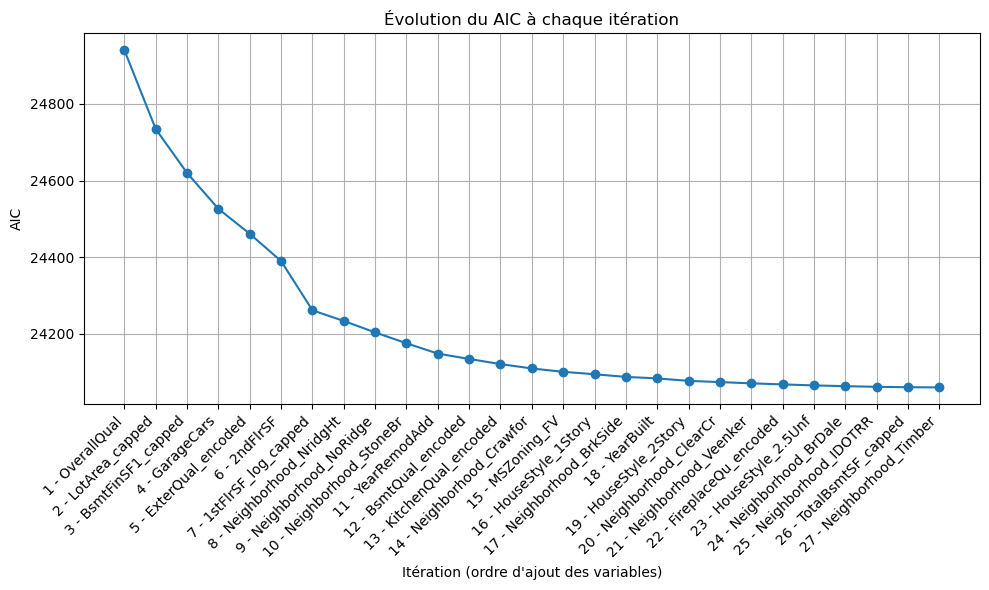

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x21ce3ad99d0>,
 ['OverallQual',
  'LotArea_capped',
  'BsmtFinSF1_capped',
  'GarageCars',
  'ExterQual_encoded',
  '2ndFlrSF',
  '1stFlrSF_log_capped',
  'Neighborhood_NridgHt',
  'Neighborhood_NoRidge',
  'Neighborhood_StoneBr',
  'YearRemodAdd',
  'BsmtQual_encoded',
  'KitchenQual_encoded',
  'Neighborhood_Crawfor',
  'MSZoning_FV',
  'HouseStyle_1Story',
  'Neighborhood_BrkSide',
  'YearBuilt',
  'HouseStyle_2Story',
  'Neighborhood_ClearCr',
  'Neighborhood_Veenker',
  'FireplaceQu_encoded',
  'HouseStyle_2.5Unf',
  'Neighborhood_BrDale',
  'Neighborhood_IDOTRR',
  'TotalBsmtSF_capped',
  'Neighborhood_Timber'],
 [(1, 'OverallQual', 24940.22705967022),
  (2, 'LotArea_capped', 24734.54577605167),
  (3, 'BsmtFinSF1_capped', 24620.009168273238),
  (4, 'GarageCars', 24526.3753422574),
  (5, 'ExterQual_encoded', 24461.208930365145),
  (6, '2ndFlrSF', 24390.177236542146),
  (7, '1stFlrSF_log_capped', 24261.660990167005)

In [109]:
forward_selection(X_train_reduced, y_train, criterion='aic', verbose=True)

In [110]:
selected_features_selected = ['OverallQual',
  'LotArea_capped',
  'BsmtFinSF1_capped',
  'GarageCars',
  'ExterQual_encoded',
  '2ndFlrSF',
  '1stFlrSF_log_capped',
  'Neighborhood_NridgHt',
  'Neighborhood_NoRidge',
  'Neighborhood_StoneBr',
  'YearRemodAdd',
  'BsmtQual_encoded',
  'KitchenQual_encoded',
  'Neighborhood_Crawfor',
  'MSZoning_FV',
  'HouseStyle_1Story',
  'Neighborhood_BrkSide',
  'YearBuilt',
  'HouseStyle_2Story',
  'Neighborhood_ClearCr',
  'Neighborhood_Veenker',
  'FireplaceQu_encoded',
  'HouseStyle_2.5Unf',
  'Neighborhood_BrDale',
  'Neighborhood_IDOTRR',
  'TotalBsmtSF_capped',
  'Neighborhood_Timber']

X_train_reduced = X_train[selected_features_selected]

X_test_reduced = X_test[selected_features_selected]

X_train_reduced = X_train_reduced.astype(float)
X_test_reduced = X_test_reduced.astype(float)

#Ajout de la constante !
X_train_reduced_fit = np.c_[np.ones(X_train_reduced.shape[0]), X_train_reduced]

model = sm.OLS(y_train, X_train_reduced_fit)
results = model.fit()

In [111]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        12:01:14   Log-Likelihood:                -12002.
No. Observations:                1022   AIC:                         2.406e+04
Df Residuals:                     994   BIC:                         2.420e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.024e+06   1.53e+05     -6.672      0.000   -1.32e+06   -7.23e+05
x1          1.226e+04   1363.894      8.992      0.000    9587.311    1.49e+04
x2             2.8813      0.349      8.252      0.000       2.196       3.566
x3            24.7371      2.620      9.441      0.000      19.596      29.879
x4          9194.6729   1864.399      4.932      0.000    5536.062    1.29e+04
x5          7346.6448   2872.645      2.557      0.011    1709.499     1.3e+04
x6            58.6081      5.079     11.538      0.000      48.640      68.576
x7          4.416e+04   6510.640      6.783      0.000    3.14e+04    5.69e+04
x8          3.958e+04   5191.777      7.624      0.000    2.94e+04    4.98e+04
x9          4.846e+04   6526.790      7.425      0.000    3.57e+04    6.13e+04
x10         4.763e+04   7458.889      6.386      0.000     3.3e+04    6.23e+04
x11          176.7505     69.158      2.556      0.011      41.038     312.463
x12         4951.6538   2072.078      2.390      0.017     885.504    9017.803
x13         1.027e+04   2435.052      4.219      0.000    5495.000    1.51e+04
x14         2.597e+04   5498.816      4.723      0.000    1.52e+04    3.68e+04
x15         2.012e+04   5328.795      3.776      0.000    9662.766    3.06e+04
x16         9465.8605   3618.247      2.616      0.009    2365.581    1.66e+04
x17         1.834e+04   5267.373      3.482      0.001    8003.024    2.87e+04
x18          160.3300     54.408      2.947      0.003      53.563     267.097
x19        -1.403e+04   4064.652     -3.453      0.001    -2.2e+04   -6057.396
x20         1.602e+04   7419.942      2.159      0.031    1460.813    3.06e+04
x21         2.552e+04   1.11e+04      2.294      0.022    3694.049    4.73e+04
x22         1574.1079    674.358      2.334      0.020     250.780    2897.436
x23        -2.415e+04    1.1e+04     -2.205      0.028   -4.56e+04   -2654.804
x24         1.841e+04   9687.739      1.900      0.058    -605.296    3.74e+04
x25         1.243e+04   6761.593      1.839      0.066    -834.741    2.57e+04
x26           10.2432      5.828      1.757      0.079      -1.194      21.681
x27         9853.1571   6254.174      1.575      0.115   -2419.742    2.21e+04
==============================================================================
Omnibus:                      320.140   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11485.957
Skew:                           0.738   Prob(JB):                         0.00
Kurtosis:                      19.357   Cond. No.                     1.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+06. This might indic

In [112]:

beta_hat = results.params.tolist()
eval_modele_regression_lineaire(X_train_reduced,X_test_reduced,y_train,y_test,beta_hat)


..... Calcul des résidus : [Ok]

--------------------------------
HYPOTHESES SUR LES RESIDUS
--------------------------------
..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value 4.5794983808193865e-08] [KO !!!]
..... Indépendance des résidus (test de Durbin Watson) :[valeur 1.9732774502770434] [OK]
..... Normalité des résidus (test de Jarcque Bera) :[p_value 0.0] [KO !!!]
..... Normalité des résidus (test de Shapiro Wilk) :[p_value 2.1477785043187476e-22] [KO !!!]
..... Normalité des résidus (test d'Anderson Darling) : [KO !!!]

--------------------------------------------
SIGNIFICATIVITE DES COEFFICIENTS
 > Interprétable si normalité des résidus
--------------------------------------------
..... Coefficient 0: valeur = -1023837.9047, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 1: valeur = 12263.7535, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 2: valeur = 2.8813, p-value = 0.0000 : Coefficient significatif [OK]
..... Coeffi

# Elimination progressive (Backward elimination)

In [113]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def backward_elimination(X, y, criterion='aic', verbose=True):
    selected_vars = list(X.columns)
    history = []
    iteration = 1
    best_new_score = None

    # Calcul initial
    X_initial = sm.add_constant(X[selected_vars])
    model = sm.OLS(y, X_initial).fit()
    current_score = model.aic if criterion == 'aic' else model.bic

    while len(selected_vars) > 1:
        scores_with_candidates = []

        if verbose:
            if best_new_score is not None:
              print(f"\nÉtape {iteration} - (Meileur AIC : {best_new_score:.2f})")
            else:
              print(f"\nÉtape {iteration}")


            print(f"Variables actuellement sélectionnées : {selected_vars}")
            print("Évaluation des suppressions de variables :")

        for candidate in selected_vars:
            trial_vars = [var for var in selected_vars if var != candidate]
            X_trial = sm.add_constant(X[trial_vars])
            model = sm.OLS(y, X_trial).fit()
            score = model.aic if criterion == 'aic' else model.bic
            scores_with_candidates.append((score, candidate))
            if verbose:
                print(f"  - Suppression de {candidate:<22} → Modèle : {trial_vars} | {criterion.upper()} = {score:.2f}")

        scores_with_candidates.sort()
        best_new_score, worst_variable = scores_with_candidates[0]

        if best_new_score < current_score:
            selected_vars.remove(worst_variable)
            current_score = best_new_score
            history.append((len(selected_vars), worst_variable, best_new_score))

            if verbose:
                print(f">>> Variable supprimée : '{worst_variable}'")
                print(f"    {criterion.upper()} après suppression : {best_new_score:.2f}")
        else:
            if verbose:
                print("Aucune amélioration. Arrêt de la sélection.")
            break

        iteration += 1

    # Modèle final
    final_model = sm.OLS(y, sm.add_constant(X[selected_vars])).fit()

    # Visualisation du score au fil des itérations
    iteration_labels = [f"{step[0]} - {step[1]}" for step in history]
    scores = [step[2] for step in history]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o')
    plt.title(f"Évolution du {criterion.upper()} à chaque itération")
    plt.xlabel("Itération (suppression de variables)")
    plt.ylabel(f"{criterion.upper()}")
    plt.xticks(ticks=range(1, len(scores) + 1), labels=iteration_labels, rotation=45, ha="right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return final_model, selected_vars, history



Étape 1
Variables actuellement sélectionnées : ['OverallQual', 'LotArea_capped', 'BsmtFinSF1_capped', 'GarageCars', 'ExterQual_encoded', '2ndFlrSF', '1stFlrSF_log_capped', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'YearRemodAdd', 'BsmtQual_encoded', 'KitchenQual_encoded', 'Neighborhood_Crawfor', 'MSZoning_FV', 'HouseStyle_1Story', 'Neighborhood_BrkSide', 'YearBuilt', 'HouseStyle_2Story', 'Neighborhood_ClearCr', 'Neighborhood_Veenker', 'FireplaceQu_encoded', 'HouseStyle_2.5Unf', 'Neighborhood_BrDale', 'Neighborhood_IDOTRR', 'TotalBsmtSF_capped', 'Neighborhood_Timber']
Évaluation des suppressions de variables :
  - Suppression de OverallQual            → Modèle : ['LotArea_capped', 'BsmtFinSF1_capped', 'GarageCars', 'ExterQual_encoded', '2ndFlrSF', '1stFlrSF_log_capped', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'YearRemodAdd', 'BsmtQual_encoded', 'KitchenQual_encoded', 'Neighborhood_Crawfor', 'MSZoning_FV', 'HouseStyle_1Story'

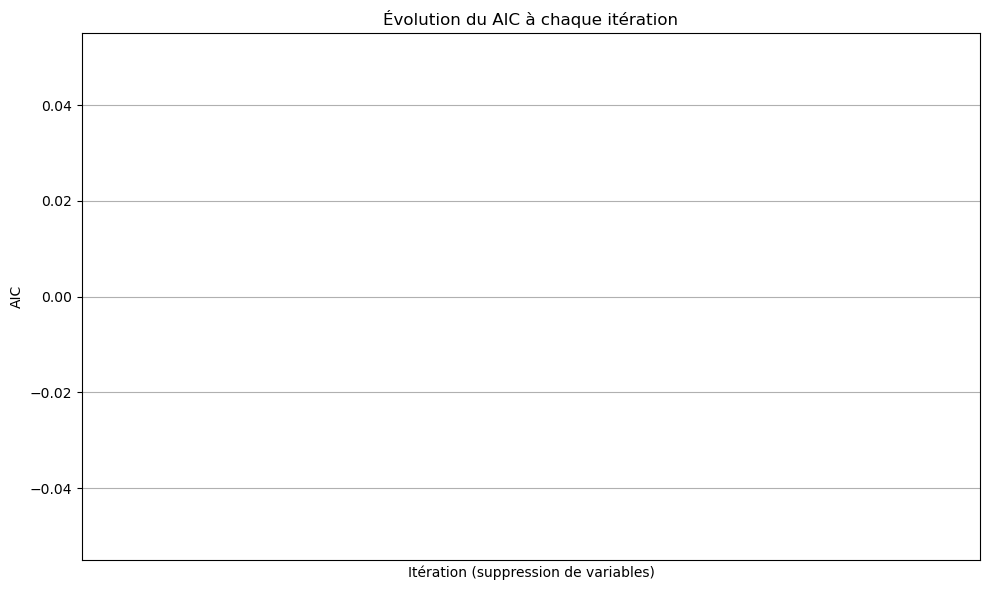

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x21ce10a3500>,
 ['OverallQual',
  'LotArea_capped',
  'BsmtFinSF1_capped',
  'GarageCars',
  'ExterQual_encoded',
  '2ndFlrSF',
  '1stFlrSF_log_capped',
  'Neighborhood_NridgHt',
  'Neighborhood_NoRidge',
  'Neighborhood_StoneBr',
  'YearRemodAdd',
  'BsmtQual_encoded',
  'KitchenQual_encoded',
  'Neighborhood_Crawfor',
  'MSZoning_FV',
  'HouseStyle_1Story',
  'Neighborhood_BrkSide',
  'YearBuilt',
  'HouseStyle_2Story',
  'Neighborhood_ClearCr',
  'Neighborhood_Veenker',
  'FireplaceQu_encoded',
  'HouseStyle_2.5Unf',
  'Neighborhood_BrDale',
  'Neighborhood_IDOTRR',
  'TotalBsmtSF_capped',
  'Neighborhood_Timber'],
 [])

In [114]:
backward_elimination(X_train_reduced, y_train, criterion='aic', verbose=True)

# Pas à Pas (stepwise selection)

In [115]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def stepwise_selection(X, y, criterion='aic', verbose=True):
    remaining_vars = list(X.columns)
    selected_vars = []
    history = []
    current_score = float('inf')
    iteration = 1
    best_new_score = None

    while True:
        changed = False
        scores_with_add = []

        # Étape forward : test d'ajout de variables
        if verbose:
            if best_new_score is not None:
              print(f"\nÉtape {iteration} - Phase d'ajout (Meileur AIC : {best_new_score:.2f})")
            else:
              print(f"\nÉtape {iteration} - Phase d'ajout")
            print(f"Variables actuellement sélectionnées : {selected_vars if selected_vars else 'aucune'}")
            print("Évaluation des ajouts possibles :")

        for candidate in remaining_vars:
            trial_vars = selected_vars + [candidate]
            X_trial = sm.add_constant(X[trial_vars])
            model = sm.OLS(y, X_trial).fit()
            score = model.aic if criterion == 'aic' else model.bic
            scores_with_add.append((score, candidate))
            if verbose:
                print(f"  - Ajout de {candidate:<22} → Modèle : {trial_vars} | {criterion.upper()} = {score:.2f}")

        if scores_with_add:
            scores_with_add.sort()
            best_new_score, best_candidate = scores_with_add[0]

            if best_new_score < current_score:
                selected_vars.append(best_candidate)
                remaining_vars.remove(best_candidate)
                current_score = best_new_score
                history.append((len(selected_vars), f"+ {best_candidate}", best_new_score))
                changed = True
                if verbose:
                    print(f">>> Variable ajoutée : '{best_candidate}'")
                    print(f"    {criterion.upper()} après ajout : {best_new_score:.2f}")

        # Étape backward : test de suppression de variables
        scores_with_remove = []
        if len(selected_vars) > 1:
            if verbose:
                print(f"\nÉtape {iteration} - Phase de suppression (Meileur AIC : {best_new_score:.2f})")
                print("Évaluation des suppressions possibles :")

            for candidate in selected_vars:
                trial_vars = [var for var in selected_vars if var != candidate]
                X_trial = sm.add_constant(X[trial_vars])
                model = sm.OLS(y, X_trial).fit()
                score = model.aic if criterion == 'aic' else model.bic
                scores_with_remove.append((score, candidate))
                if verbose:
                    print(f"  - Suppression de {candidate:<22} → Modèle : {trial_vars} | {criterion.upper()} = {score:.2f}")

            scores_with_remove.sort()
            best_new_score, worst_candidate = scores_with_remove[0]

            if best_new_score < current_score:
                selected_vars.remove(worst_candidate)
                remaining_vars.append(worst_candidate)
                current_score = best_new_score
                history.append((len(selected_vars), f"- {worst_candidate}", best_new_score))
                changed = True
                if verbose:
                    print(f">>> Variable supprimée : '{worst_candidate}'")
                    print(f"    {criterion.upper()} après suppression : {best_new_score:.2f}")

        if not changed:
            if verbose:
                print("Aucune amélioration possible. Fin de la sélection pas à pas.")
            break

        iteration += 1

    # Modèle final
    final_model = sm.OLS(y, sm.add_constant(X[selected_vars])).fit()

    # Visualisation du critère
    iteration_labels = [f"{step[0]} - {step[1]}" for step in history]
    scores = [step[2] for step in history]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(scores) + 1), scores, marker='o')
    plt.title(f"Évolution du {criterion.upper()} à chaque itération")
    plt.xlabel("Itération (ajouts et suppressions)")
    plt.ylabel(f"{criterion.upper()}")
    plt.xticks(ticks=range(1, len(scores) + 1), labels=iteration_labels, rotation=45, ha="right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return final_model, selected_vars, history



Étape 1 - Phase d'ajout
Variables actuellement sélectionnées : aucune
Évaluation des ajouts possibles :
  - Ajout de OverallQual            → Modèle : ['OverallQual'] | AIC = 24940.23
  - Ajout de LotArea_capped         → Modèle : ['LotArea_capped'] | AIC = 25693.95
  - Ajout de BsmtFinSF1_capped      → Modèle : ['BsmtFinSF1_capped'] | AIC = 25761.82
  - Ajout de GarageCars             → Modèle : ['GarageCars'] | AIC = 25373.29
  - Ajout de ExterQual_encoded      → Modèle : ['ExterQual_encoded'] | AIC = 25336.56
  - Ajout de 2ndFlrSF               → Modèle : ['2ndFlrSF'] | AIC = 25811.10
  - Ajout de 1stFlrSF_log_capped    → Modèle : ['1stFlrSF_log_capped'] | AIC = 25503.50
  - Ajout de Neighborhood_NridgHt   → Modèle : ['Neighborhood_NridgHt'] | AIC = 25759.91
  - Ajout de Neighborhood_NoRidge   → Modèle : ['Neighborhood_NoRidge'] | AIC = 25807.71
  - Ajout de Neighborhood_StoneBr   → Modèle : ['Neighborhood_StoneBr'] | AIC = 25866.70
  - Ajout de YearRemodAdd           → Modèle : ['

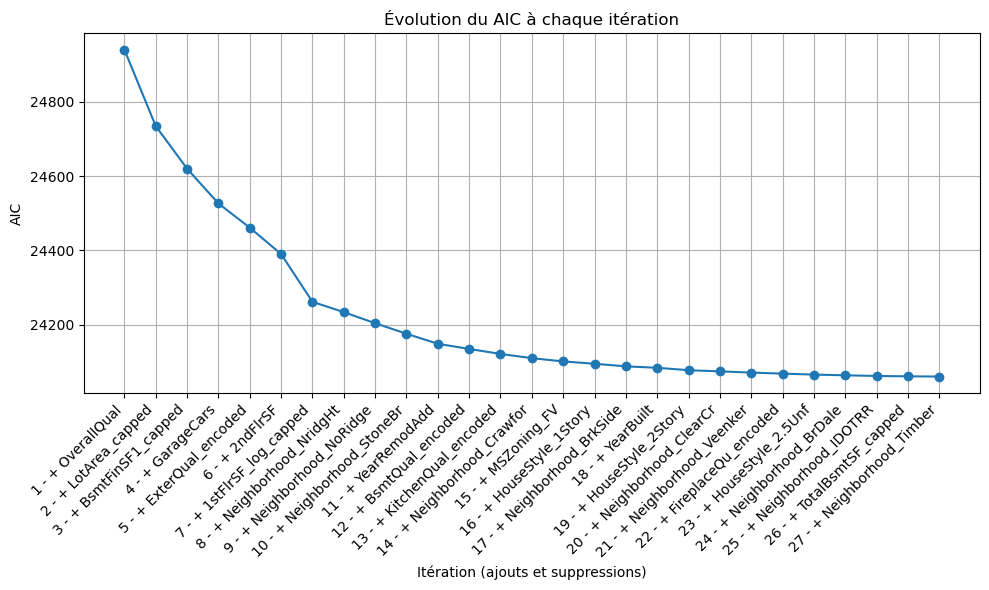

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x21ce8f22210>,
 ['OverallQual',
  'LotArea_capped',
  'BsmtFinSF1_capped',
  'GarageCars',
  'ExterQual_encoded',
  '2ndFlrSF',
  '1stFlrSF_log_capped',
  'Neighborhood_NridgHt',
  'Neighborhood_NoRidge',
  'Neighborhood_StoneBr',
  'YearRemodAdd',
  'BsmtQual_encoded',
  'KitchenQual_encoded',
  'Neighborhood_Crawfor',
  'MSZoning_FV',
  'HouseStyle_1Story',
  'Neighborhood_BrkSide',
  'YearBuilt',
  'HouseStyle_2Story',
  'Neighborhood_ClearCr',
  'Neighborhood_Veenker',
  'FireplaceQu_encoded',
  'HouseStyle_2.5Unf',
  'Neighborhood_BrDale',
  'Neighborhood_IDOTRR',
  'TotalBsmtSF_capped',
  'Neighborhood_Timber'],
 [(1, '+ OverallQual', 24940.22705967022),
  (2, '+ LotArea_capped', 24734.54577605167),
  (3, '+ BsmtFinSF1_capped', 24620.009168273238),
  (4, '+ GarageCars', 24526.3753422574),
  (5, '+ ExterQual_encoded', 24461.208930365145),
  (6, '+ 2ndFlrSF', 24390.177236542146),
  (7, '+ 1stFlrSF_log_capped', 24261

In [116]:
stepwise_selection(X_train_reduced, y_train, criterion='aic', verbose=True)

# METHODES DE PENALISATION

In [117]:
#La librairie Stats Models, ne propose pas la régularisation.
#On utilise donc la librairie SciKit Learn: Pas besoin d'ajouter une constante.

from sklearn.linear_model import Lasso

In [118]:
alpha = 0.1

In [119]:
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [120]:
coefficients = pd.Series(lasso.coef_, index=X_train_scaled.columns)

#Affichage de l'intercept (beta_0)
print("Beta 0 :",lasso.intercept_)
print("\n")

# Affichage des coefficients
print("Coefficients Lasso (certaines valeurs peuvent être nulles) :")
print(coefficients)

# Variables sélectionnées automatiquement (coefficients non nuls)
selected_variables = coefficients[coefficients != 0].index.tolist()
print("\nVariables sélectionnées par Lasso :")
print(selected_variables)

Beta 0 : 181312.69275929552


Coefficients Lasso (certaines valeurs peuvent être nulles) :
OverallQual             16738.468880
GarageCars               6379.017961
TotalBsmtSF_capped       3919.167557
1stFlrSF_log_capped     20534.143190
2ndFlrSF                31624.763559
YearBuilt               23742.024919
YearRemodAdd             3769.226956
FullBath                 1565.975336
HalfBath                 1818.660780
BsmtFinSF1_capped       10737.228079
LotArea_capped          11150.143270
OpenPorchSF_log          1170.093168
hasPorch                 -776.221657
TotalSF_log_capped      -9199.655808
Age_capped              21163.506612
FireplaceQu_encoded      2623.100880
KitchenQual_encoded      6233.416511
BsmtQual_encoded         3442.499540
Neighborhood_Blueste      458.656313
Neighborhood_BrDale      1797.074271
Neighborhood_BrkSide     1619.218188
Neighborhood_ClearCr      502.518237
Neighborhood_CollgCr    -1981.309076
Neighborhood_Crawfor     2449.673687
Neighborhood_Edwards 

In [121]:
#Recherche du meilleurs parametre alpha

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print(f"Meilleur alpha sélectionné par validation croisée : {best_alpha:.5f}")


#Affichage de l'intercept (beta_0)
print("Beta 0 :",lasso_cv.intercept_)
print("\n")

# Affichage des coefficients
coefficients = pd.Series(lasso_cv.coef_, index=X_train_scaled.columns)
print("Coefficients Lasso (certaines valeurs peuvent être nulles) :")
print(coefficients)

selected_vars = X_train_scaled.columns[lasso_cv.coef_ != 0].tolist()
print("\nVariables sélectionnées par LassoCV :")
print(selected_vars)

Meilleur alpha sélectionné par validation croisée : 460.52100
Beta 0 : 181312.6927592955


Coefficients Lasso (certaines valeurs peuvent être nulles) :
OverallQual             17285.108153
GarageCars               6331.762829
TotalBsmtSF_capped       3867.044623
1stFlrSF_log_capped     14024.830294
2ndFlrSF                19703.862580
YearBuilt                3493.288443
YearRemodAdd             2920.394819
FullBath                  971.489824
HalfBath                  800.046530
BsmtFinSF1_capped       10515.639645
LotArea_capped          10314.211173
OpenPorchSF_log             0.000000
hasPorch                   -0.000000
TotalSF_log_capped          0.000000
Age_capped                 -0.000000
FireplaceQu_encoded      2690.004045
KitchenQual_encoded      6632.128233
BsmtQual_encoded         3736.415479
Neighborhood_Blueste        0.000000
Neighborhood_BrDale       541.404717
Neighborhood_BrkSide     2085.523864
Neighborhood_ClearCr     1306.856485
Neighborhood_CollgCr       -0.0000

In [130]:
selected_features_selected=['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'FireplaceQu_encoded', 'KitchenQual_encoded', 'BsmtQual_encoded', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_encoded', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'MSZoning_FV']
X_train_reduced = X_train_scaled[selected_features_selected]
X_test_reduced = X_test_scaled[selected_features_selected]
lasso_cv.fit(X_train_reduced, y_train)
beta_hat = np.concatenate(([lasso_cv.intercept_], lasso_cv.coef_))
eval_modele_regression_lineaire(X_train_reduced,X_test_reduced,y_train,y_test,beta_hat)

..... Calcul des résidus : [Ok]

--------------------------------
HYPOTHESES SUR LES RESIDUS
--------------------------------
..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value 4.0920487197439475e-06] [KO !!!]
..... Indépendance des résidus (test de Durbin Watson) :[valeur 1.979143135949962] [OK]
..... Normalité des résidus (test de Jarcque Bera) :[p_value 0.0] [KO !!!]
..... Normalité des résidus (test de Shapiro Wilk) :[p_value 5.536360039827991e-23] [KO !!!]
..... Normalité des résidus (test d'Anderson Darling) : [KO !!!]

--------------------------------------------
SIGNIFICATIVITE DES COEFFICIENTS
 > Interprétable si normalité des résidus
--------------------------------------------
..... Coefficient 0: valeur = 181312.6928, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 1: valeur = 16836.9890, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 2: valeur = 6525.0499, p-value = 0.0000 : Coefficient significatif [OK]
..... Coeffic

# Pénalisation L2 (Ridge)

In [123]:
from sklearn.linear_model import RidgeCV


# Définir les valeurs d'alpha à tester
alphas = np.logspace(-4, 4, 100)

# Instancier et entraîner le modèle RidgeCV directement
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_scaled, y_train)

# Meilleur alpha
best_alpha = ridge_cv.alpha_
print(f"Meilleur alpha sélectionné par validation croisée : {best_alpha:.5f}")

# Intercept (beta_0)
print("Beta 0 :", ridge_cv.intercept_)
print("\n")

# Coefficients
coefficients = pd.Series(ridge_cv.coef_, index=X_train_scaled.columns)
print("Coefficients Ridge (pénalisés mais rarement nuls) :")
print(coefficients)


Meilleur alpha sélectionné par validation croisée : 37.64936
Beta 0 : 181312.6927592955


Coefficients Ridge (pénalisés mais rarement nuls) :
OverallQual             15600.639093
GarageCars               6491.921737
TotalBsmtSF_capped       4277.269968
1stFlrSF_log_capped     10730.486728
2ndFlrSF                18394.754180
YearBuilt                4088.528440
YearRemodAdd             3247.001356
FullBath                 2132.213414
HalfBath                 2035.096775
BsmtFinSF1_capped       10478.278062
LotArea_capped          10780.877936
OpenPorchSF_log           985.217936
hasPorch                -1043.695876
TotalSF_log_capped       2913.704157
Age_capped                989.615446
FireplaceQu_encoded      3105.717540
KitchenQual_encoded      6652.265817
BsmtQual_encoded         3992.358181
Neighborhood_Blueste      187.303984
Neighborhood_BrDale      1080.695497
Neighborhood_BrkSide     2177.668496
Neighborhood_ClearCr      951.724226
Neighborhood_CollgCr    -1501.262624
Neighbo

In [131]:
selected_features_selected=['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'FireplaceQu_encoded', 'KitchenQual_encoded', 'BsmtQual_encoded', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_encoded', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'MSZoning_FV']
X_train_reduced = X_train_scaled[selected_features_selected]
X_test_reduced = X_test_scaled[selected_features_selected]
ridge_cv.fit(X_train_reduced, y_train)
beta_hat = np.concatenate(([ridge_cv.intercept_], ridge_cv.coef_))
eval_modele_regression_lineaire(X_train_reduced,X_test_reduced,y_train,y_test,beta_hat)

..... Calcul des résidus : [Ok]

--------------------------------
HYPOTHESES SUR LES RESIDUS
--------------------------------
..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value 3.4786068493249343e-06] [KO !!!]
..... Indépendance des résidus (test de Durbin Watson) :[valeur 1.9784852352322475] [OK]
..... Normalité des résidus (test de Jarcque Bera) :[p_value 0.0] [KO !!!]
..... Normalité des résidus (test de Shapiro Wilk) :[p_value 7.493312564416881e-23] [KO !!!]
..... Normalité des résidus (test d'Anderson Darling) : [KO !!!]

--------------------------------------------
SIGNIFICATIVITE DES COEFFICIENTS
 > Interprétable si normalité des résidus
--------------------------------------------
..... Coefficient 0: valeur = 181312.6928, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 1: valeur = 16836.9890, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 2: valeur = 6525.0499, p-value = 0.0000 : Coefficient significatif [OK]
..... Coeffi

# Elastic Net (mélange de lasso et rigde)

In [125]:
from sklearn.linear_model import ElasticNetCV

# Définir les grilles de recherche pour alpha et l1_ratio
alphas = np.logspace(-4, 4, 100)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 1.0]  # 1.0 = Lasso pur, 0.0 = Ridge pur

# Instancier ElasticNetCV
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=10000)
elastic_cv.fit(X_train_scaled, y_train)

# Affichage des hyperparamètres optimaux
print(f"Meilleur alpha sélectionné par validation croisée : {elastic_cv.alpha_:.5f}")
print(f"Meilleur l1_ratio (mélange Ridge/Lasso) : {elastic_cv.l1_ratio_:.2f}")
print("\n")

# Intercept
print("Beta 0 :", elastic_cv.intercept_)
print("\n")

# Coefficients
coefficients = pd.Series(elastic_cv.coef_, index=X_train.columns)
print("Coefficients ElasticNet :")
print(coefficients)

# Variables sélectionnées (coefficients ≠ 0)
selected_vars = X_train_scaled.columns[elastic_cv.coef_ != 0].tolist()
print("\nVariables sélectionnées par ElasticNetCV :")
print(selected_vars)

Meilleur alpha sélectionné par validation croisée : 0.08111
Meilleur l1_ratio (mélange Ridge/Lasso) : 0.10


Beta 0 : 181312.6927592955


Coefficients ElasticNet :
OverallQual             14636.321513
GarageCars               6507.880817
TotalBsmtSF_capped       4584.223637
1stFlrSF_log_capped      9014.363056
2ndFlrSF                14271.330753
YearBuilt                2813.381316
YearRemodAdd             3201.052689
FullBath                 2490.316538
HalfBath                 2153.105422
BsmtFinSF1_capped       10168.523330
LotArea_capped          10362.884235
OpenPorchSF_log           974.758982
hasPorch                 -987.852830
TotalSF_log_capped       5175.561466
Age_capped               -296.383583
FireplaceQu_encoded      3410.409566
KitchenQual_encoded      6733.697693
BsmtQual_encoded         4236.333616
Neighborhood_Blueste       88.907249
Neighborhood_BrDale       756.779017
Neighborhood_BrkSide     2083.724251
Neighborhood_ClearCr     1036.214947
Neighborhood_CollgCr  

In [132]:
selected_features_selected=['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'FireplaceQu_encoded', 'KitchenQual_encoded', 'BsmtQual_encoded', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_encoded', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'MSZoning_FV']
X_train_reduced = X_train_scaled[selected_features_selected]
X_test_reduced = X_test_scaled[selected_features_selected]
elastic_cv.fit(X_train_reduced, y_train)
beta_hat = np.concatenate(([elastic_cv.intercept_], elastic_cv.coef_))
eval_modele_regression_lineaire(X_train_reduced,X_test_reduced,y_train,y_test,beta_hat)

..... Calcul des résidus : [Ok]

--------------------------------
HYPOTHESES SUR LES RESIDUS
--------------------------------
..... Homoscédasticité des résidus (test de Breush-Pagan) :[p-value 3.4412359742107583e-06] [KO !!!]
..... Indépendance des résidus (test de Durbin Watson) :[valeur 1.9783030007684583] [OK]
..... Normalité des résidus (test de Jarcque Bera) :[p_value 0.0] [KO !!!]
..... Normalité des résidus (test de Shapiro Wilk) :[p_value 3.135959537260485e-23] [KO !!!]
..... Normalité des résidus (test d'Anderson Darling) : [KO !!!]

--------------------------------------------
SIGNIFICATIVITE DES COEFFICIENTS
 > Interprétable si normalité des résidus
--------------------------------------------
..... Coefficient 0: valeur = 181312.6928, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 1: valeur = 16836.9890, p-value = 0.0000 : Coefficient significatif [OK]
..... Coefficient 2: valeur = 6525.0499, p-value = 0.0000 : Coefficient significatif [OK]
..... Coeffi

# Submission

## Model LinearRegressor Transformed Data

In [170]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['Age_capped'] = train_df['Age'].clip(upper=train_df['Age'].quantile(0.95))
train_df['TotalSF_log'] = np.log1p(train_df['TotalSF'])
train_df['TotalSF_log_capped'] = train_df['TotalSF_log'].clip(upper=train_df['TotalSF_log'].quantile(0.99), lower=train_df['TotalSF_log'].quantile(0.01))
train_df['hasPorch'] = (
    (train_df['OpenPorchSF'] > 0) |
    (train_df['EnclosedPorch'] > 0) |
    (train_df['3SsnPorch'] > 0) |
    (train_df['ScreenPorch'] > 0)
).astype(int)
train_df['OpenPorchSF_log'] = np.log1p(train_df['OpenPorchSF'])
train_df['LotArea_capped'] = train_df['LotArea'].clip(upper=train_df['LotArea'].quantile(0.95))
train_df['BsmtFinSF1_capped'] = train_df['BsmtFinSF1'].clip(upper=train_df['BsmtFinSF1'].quantile(0.99))
train_df['1stFlrSF_log'] = np.log1p(train_df['1stFlrSF'])
train_df['1stFlrSF_log_capped'] = train_df['1stFlrSF_log'].clip(upper=train_df['1stFlrSF_log'].quantile(0.99), lower=train_df['1stFlrSF_log'].quantile(0.01))
train_df['TotalBsmtSF_capped'] = train_df['TotalBsmtSF'].clip(upper=train_df['TotalBsmtSF'].quantile(0.95), lower=train_df['TotalBsmtSF'].quantile(0.03))
train_df['GarageArea_capped'] = train_df['GarageArea'].clip(upper=train_df['GarageArea'].quantile(0.95))

test_df['Age_capped'] = test_df['Age'].clip(upper=test_df['Age'].quantile(0.95))
test_df['TotalSF_log'] = np.log1p(test_df['TotalSF'])
test_df['TotalSF_log_capped'] = test_df['TotalSF_log'].clip(upper=test_df['TotalSF_log'].quantile(0.99), lower=test_df['TotalSF_log'].quantile(0.01))
test_df['hasPorch'] = (
    (test_df['OpenPorchSF'] > 0) |
    (test_df['EnclosedPorch'] > 0) |
    (test_df['3SsnPorch'] > 0) |
    (test_df['ScreenPorch'] > 0)
).astype(int)
test_df['OpenPorchSF_log'] = np.log1p(test_df['OpenPorchSF'])
test_df['LotArea_capped'] = test_df['LotArea'].clip(upper=test_df['LotArea'].quantile(0.95))
test_df['BsmtFinSF1_capped'] = test_df['BsmtFinSF1'].clip(upper=test_df['BsmtFinSF1'].quantile(0.99))
test_df['1stFlrSF_log'] = np.log1p(test_df['1stFlrSF'])
test_df['1stFlrSF_log_capped'] = test_df['1stFlrSF_log'].clip(upper=test_df['1stFlrSF_log'].quantile(0.99), lower=test_df['1stFlrSF_log'].quantile(0.01))
test_df['TotalBsmtSF_capped'] = test_df['TotalBsmtSF'].clip(upper=test_df['TotalBsmtSF'].quantile(0.95), lower=test_df['TotalBsmtSF'].quantile(0.03))
test_df['GarageArea_capped'] = test_df['GarageArea'].clip(upper=test_df['GarageArea'].quantile(0.95))

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Variables quantitatives
num_cols = ['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log', 'hasPorch', 'TotalSF_log_capped',  'Age_capped']

# Variables qualitatives ordinales et nominales
ordinal_cols = ['FireplaceQu', 'KitchenQual', 'BsmtQual', 'ExterQual']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex']]
nom_cols = ['Neighborhood', 'HouseStyle', 'MSZoning']

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ordinal_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')

Erreur quadratique moyenne: 1077420544.6431262
Soumission enregistrée dans submission.csv


## Model LinearRegression ClassicData

In [172]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Colonnes ordinales identifiées manuellement
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Fa', 'TA', 'Gd', 'Ex']]

# Identification des colonnes numériques et qualitatives
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Gestion des colonnes ordinales et non ordinales
ord_cols = [col for col in cat_cols if col in ordinal_cols]
nom_cols = [col for col in cat_cols if col not in ordinal_cols]

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ord_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')


Erreur quadratique moyenne: 900429502.0538031
Soumission enregistrée dans submission.csv


## Model Lasso Regressor - All Data

In [173]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Colonnes ordinales identifiées manuellement
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Fa', 'TA', 'Gd', 'Ex']]

# Identification des colonnes numériques et qualitatives
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Gestion des colonnes ordinales et non ordinales
ord_cols = [col for col in cat_cols if col in ordinal_cols]
nom_cols = [col for col in cat_cols if col not in ordinal_cols]

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ord_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', Lasso())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')


Erreur quadratique moyenne: 831607268.8107239
Soumission enregistrée dans submission.csv


## Model Lasso Regressor

In [178]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['Age_capped'] = train_df['Age'].clip(upper=train_df['Age'].quantile(0.95))
train_df['TotalSF_log'] = np.log1p(train_df['TotalSF'])
train_df['TotalSF_log_capped'] = train_df['TotalSF_log'].clip(upper=train_df['TotalSF_log'].quantile(0.99), lower=train_df['TotalSF_log'].quantile(0.01))
train_df['hasPorch'] = (
    (train_df['OpenPorchSF'] > 0) |
    (train_df['EnclosedPorch'] > 0) |
    (train_df['3SsnPorch'] > 0) |
    (train_df['ScreenPorch'] > 0)
).astype(int)
train_df['OpenPorchSF_log'] = np.log1p(train_df['OpenPorchSF'])
train_df['LotArea_capped'] = train_df['LotArea'].clip(upper=train_df['LotArea'].quantile(0.95))
train_df['BsmtFinSF1_capped'] = train_df['BsmtFinSF1'].clip(upper=train_df['BsmtFinSF1'].quantile(0.99))
train_df['1stFlrSF_log'] = np.log1p(train_df['1stFlrSF'])
train_df['1stFlrSF_log_capped'] = train_df['1stFlrSF_log'].clip(upper=train_df['1stFlrSF_log'].quantile(0.99), lower=train_df['1stFlrSF_log'].quantile(0.01))
train_df['TotalBsmtSF_capped'] = train_df['TotalBsmtSF'].clip(upper=train_df['TotalBsmtSF'].quantile(0.95), lower=train_df['TotalBsmtSF'].quantile(0.03))
train_df['GarageArea_capped'] = train_df['GarageArea'].clip(upper=train_df['GarageArea'].quantile(0.95))

test_df['Age_capped'] = test_df['Age'].clip(upper=test_df['Age'].quantile(0.95))
test_df['TotalSF_log'] = np.log1p(test_df['TotalSF'])
test_df['TotalSF_log_capped'] = test_df['TotalSF_log'].clip(upper=test_df['TotalSF_log'].quantile(0.99), lower=test_df['TotalSF_log'].quantile(0.01))
test_df['hasPorch'] = (
    (test_df['OpenPorchSF'] > 0) |
    (test_df['EnclosedPorch'] > 0) |
    (test_df['3SsnPorch'] > 0) |
    (test_df['ScreenPorch'] > 0)
).astype(int)
test_df['OpenPorchSF_log'] = np.log1p(test_df['OpenPorchSF'])
test_df['LotArea_capped'] = test_df['LotArea'].clip(upper=test_df['LotArea'].quantile(0.95))
test_df['BsmtFinSF1_capped'] = test_df['BsmtFinSF1'].clip(upper=test_df['BsmtFinSF1'].quantile(0.99))
test_df['1stFlrSF_log'] = np.log1p(test_df['1stFlrSF'])
test_df['1stFlrSF_log_capped'] = test_df['1stFlrSF_log'].clip(upper=test_df['1stFlrSF_log'].quantile(0.99), lower=test_df['1stFlrSF_log'].quantile(0.01))
test_df['TotalBsmtSF_capped'] = test_df['TotalBsmtSF'].clip(upper=test_df['TotalBsmtSF'].quantile(0.95), lower=test_df['TotalBsmtSF'].quantile(0.03))
test_df['GarageArea_capped'] = test_df['GarageArea'].clip(upper=test_df['GarageArea'].quantile(0.95))

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Variables quantitatives
num_cols = ['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log', 'hasPorch', 'TotalSF_log_capped',  'Age_capped']

# Variables qualitatives ordinales et nominales
ordinal_cols = ['FireplaceQu', 'KitchenQual', 'BsmtQual', 'ExterQual']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex']]
nom_cols = ['Neighborhood', 'HouseStyle', 'MSZoning']

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ordinal_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', Lasso())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')

Erreur quadratique moyenne: 1077478473.6627223
Soumission enregistrée dans submission.csv


## Model RidgeRegressor

In [179]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['Age_capped'] = train_df['Age'].clip(upper=train_df['Age'].quantile(0.95))
train_df['TotalSF_log'] = np.log1p(train_df['TotalSF'])
train_df['TotalSF_log_capped'] = train_df['TotalSF_log'].clip(upper=train_df['TotalSF_log'].quantile(0.99), lower=train_df['TotalSF_log'].quantile(0.01))
train_df['hasPorch'] = (
    (train_df['OpenPorchSF'] > 0) |
    (train_df['EnclosedPorch'] > 0) |
    (train_df['3SsnPorch'] > 0) |
    (train_df['ScreenPorch'] > 0)
).astype(int)
train_df['OpenPorchSF_log'] = np.log1p(train_df['OpenPorchSF'])
train_df['LotArea_capped'] = train_df['LotArea'].clip(upper=train_df['LotArea'].quantile(0.95))
train_df['BsmtFinSF1_capped'] = train_df['BsmtFinSF1'].clip(upper=train_df['BsmtFinSF1'].quantile(0.99))
train_df['1stFlrSF_log'] = np.log1p(train_df['1stFlrSF'])
train_df['1stFlrSF_log_capped'] = train_df['1stFlrSF_log'].clip(upper=train_df['1stFlrSF_log'].quantile(0.99), lower=train_df['1stFlrSF_log'].quantile(0.01))
train_df['TotalBsmtSF_capped'] = train_df['TotalBsmtSF'].clip(upper=train_df['TotalBsmtSF'].quantile(0.95), lower=train_df['TotalBsmtSF'].quantile(0.03))
train_df['GarageArea_capped'] = train_df['GarageArea'].clip(upper=train_df['GarageArea'].quantile(0.95))

test_df['Age_capped'] = test_df['Age'].clip(upper=test_df['Age'].quantile(0.95))
test_df['TotalSF_log'] = np.log1p(test_df['TotalSF'])
test_df['TotalSF_log_capped'] = test_df['TotalSF_log'].clip(upper=test_df['TotalSF_log'].quantile(0.99), lower=test_df['TotalSF_log'].quantile(0.01))
test_df['hasPorch'] = (
    (test_df['OpenPorchSF'] > 0) |
    (test_df['EnclosedPorch'] > 0) |
    (test_df['3SsnPorch'] > 0) |
    (test_df['ScreenPorch'] > 0)
).astype(int)
test_df['OpenPorchSF_log'] = np.log1p(test_df['OpenPorchSF'])
test_df['LotArea_capped'] = test_df['LotArea'].clip(upper=test_df['LotArea'].quantile(0.95))
test_df['BsmtFinSF1_capped'] = test_df['BsmtFinSF1'].clip(upper=test_df['BsmtFinSF1'].quantile(0.99))
test_df['1stFlrSF_log'] = np.log1p(test_df['1stFlrSF'])
test_df['1stFlrSF_log_capped'] = test_df['1stFlrSF_log'].clip(upper=test_df['1stFlrSF_log'].quantile(0.99), lower=test_df['1stFlrSF_log'].quantile(0.01))
test_df['TotalBsmtSF_capped'] = test_df['TotalBsmtSF'].clip(upper=test_df['TotalBsmtSF'].quantile(0.95), lower=test_df['TotalBsmtSF'].quantile(0.03))
test_df['GarageArea_capped'] = test_df['GarageArea'].clip(upper=test_df['GarageArea'].quantile(0.95))

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Variables quantitatives
num_cols = ['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log', 'hasPorch', 'TotalSF_log_capped',  'Age_capped']

# Variables qualitatives ordinales et nominales
ordinal_cols = ['FireplaceQu', 'KitchenQual', 'BsmtQual', 'ExterQual']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex']]
nom_cols = ['Neighborhood', 'HouseStyle', 'MSZoning']

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ordinal_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', Ridge())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')

Erreur quadratique moyenne: 1079662445.1533685
Soumission enregistrée dans submission.csv


## Model ElasticNet Regressor

In [180]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['Age_capped'] = train_df['Age'].clip(upper=train_df['Age'].quantile(0.95))
train_df['TotalSF_log'] = np.log1p(train_df['TotalSF'])
train_df['TotalSF_log_capped'] = train_df['TotalSF_log'].clip(upper=train_df['TotalSF_log'].quantile(0.99), lower=train_df['TotalSF_log'].quantile(0.01))
train_df['hasPorch'] = (
    (train_df['OpenPorchSF'] > 0) |
    (train_df['EnclosedPorch'] > 0) |
    (train_df['3SsnPorch'] > 0) |
    (train_df['ScreenPorch'] > 0)
).astype(int)
train_df['OpenPorchSF_log'] = np.log1p(train_df['OpenPorchSF'])
train_df['LotArea_capped'] = train_df['LotArea'].clip(upper=train_df['LotArea'].quantile(0.95))
train_df['BsmtFinSF1_capped'] = train_df['BsmtFinSF1'].clip(upper=train_df['BsmtFinSF1'].quantile(0.99))
train_df['1stFlrSF_log'] = np.log1p(train_df['1stFlrSF'])
train_df['1stFlrSF_log_capped'] = train_df['1stFlrSF_log'].clip(upper=train_df['1stFlrSF_log'].quantile(0.99), lower=train_df['1stFlrSF_log'].quantile(0.01))
train_df['TotalBsmtSF_capped'] = train_df['TotalBsmtSF'].clip(upper=train_df['TotalBsmtSF'].quantile(0.95), lower=train_df['TotalBsmtSF'].quantile(0.03))
train_df['GarageArea_capped'] = train_df['GarageArea'].clip(upper=train_df['GarageArea'].quantile(0.95))

test_df['Age_capped'] = test_df['Age'].clip(upper=test_df['Age'].quantile(0.95))
test_df['TotalSF_log'] = np.log1p(test_df['TotalSF'])
test_df['TotalSF_log_capped'] = test_df['TotalSF_log'].clip(upper=test_df['TotalSF_log'].quantile(0.99), lower=test_df['TotalSF_log'].quantile(0.01))
test_df['hasPorch'] = (
    (test_df['OpenPorchSF'] > 0) |
    (test_df['EnclosedPorch'] > 0) |
    (test_df['3SsnPorch'] > 0) |
    (test_df['ScreenPorch'] > 0)
).astype(int)
test_df['OpenPorchSF_log'] = np.log1p(test_df['OpenPorchSF'])
test_df['LotArea_capped'] = test_df['LotArea'].clip(upper=test_df['LotArea'].quantile(0.95))
test_df['BsmtFinSF1_capped'] = test_df['BsmtFinSF1'].clip(upper=test_df['BsmtFinSF1'].quantile(0.99))
test_df['1stFlrSF_log'] = np.log1p(test_df['1stFlrSF'])
test_df['1stFlrSF_log_capped'] = test_df['1stFlrSF_log'].clip(upper=test_df['1stFlrSF_log'].quantile(0.99), lower=test_df['1stFlrSF_log'].quantile(0.01))
test_df['TotalBsmtSF_capped'] = test_df['TotalBsmtSF'].clip(upper=test_df['TotalBsmtSF'].quantile(0.95), lower=test_df['TotalBsmtSF'].quantile(0.03))
test_df['GarageArea_capped'] = test_df['GarageArea'].clip(upper=test_df['GarageArea'].quantile(0.95))

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Variables quantitatives
num_cols = ['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log', 'hasPorch', 'TotalSF_log_capped',  'Age_capped']

# Variables qualitatives ordinales et nominales
ordinal_cols = ['FireplaceQu', 'KitchenQual', 'BsmtQual', 'ExterQual']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex']]
nom_cols = ['Neighborhood', 'HouseStyle', 'MSZoning']

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ordinal_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', ElasticNet())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')

Erreur quadratique moyenne: 1569369958.0733373
Soumission enregistrée dans submission.csv


## Model RandomForestClassifier + RFE

In [187]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['Age_capped'] = train_df['Age'].clip(upper=train_df['Age'].quantile(0.95))
train_df['TotalSF_log'] = np.log1p(train_df['TotalSF'])
train_df['TotalSF_log_capped'] = train_df['TotalSF_log'].clip(upper=train_df['TotalSF_log'].quantile(0.99), lower=train_df['TotalSF_log'].quantile(0.01))
train_df['hasPorch'] = (
    (train_df['OpenPorchSF'] > 0) |
    (train_df['EnclosedPorch'] > 0) |
    (train_df['3SsnPorch'] > 0) |
    (train_df['ScreenPorch'] > 0)
).astype(int)
train_df['OpenPorchSF_log'] = np.log1p(train_df['OpenPorchSF'])
train_df['LotArea_capped'] = train_df['LotArea'].clip(upper=train_df['LotArea'].quantile(0.95))
train_df['BsmtFinSF1_capped'] = train_df['BsmtFinSF1'].clip(upper=train_df['BsmtFinSF1'].quantile(0.99))
train_df['1stFlrSF_log'] = np.log1p(train_df['1stFlrSF'])
train_df['1stFlrSF_log_capped'] = train_df['1stFlrSF_log'].clip(upper=train_df['1stFlrSF_log'].quantile(0.99), lower=train_df['1stFlrSF_log'].quantile(0.01))
train_df['TotalBsmtSF_capped'] = train_df['TotalBsmtSF'].clip(upper=train_df['TotalBsmtSF'].quantile(0.95), lower=train_df['TotalBsmtSF'].quantile(0.03))
train_df['GarageArea_capped'] = train_df['GarageArea'].clip(upper=train_df['GarageArea'].quantile(0.95))

test_df['Age_capped'] = test_df['Age'].clip(upper=test_df['Age'].quantile(0.95))
test_df['TotalSF_log'] = np.log1p(test_df['TotalSF'])
test_df['TotalSF_log_capped'] = test_df['TotalSF_log'].clip(upper=test_df['TotalSF_log'].quantile(0.99), lower=test_df['TotalSF_log'].quantile(0.01))
test_df['hasPorch'] = (
    (test_df['OpenPorchSF'] > 0) |
    (test_df['EnclosedPorch'] > 0) |
    (test_df['3SsnPorch'] > 0) |
    (test_df['ScreenPorch'] > 0)
).astype(int)
test_df['OpenPorchSF_log'] = np.log1p(test_df['OpenPorchSF'])
test_df['LotArea_capped'] = test_df['LotArea'].clip(upper=test_df['LotArea'].quantile(0.95))
test_df['BsmtFinSF1_capped'] = test_df['BsmtFinSF1'].clip(upper=test_df['BsmtFinSF1'].quantile(0.99))
test_df['1stFlrSF_log'] = np.log1p(test_df['1stFlrSF'])
test_df['1stFlrSF_log_capped'] = test_df['1stFlrSF_log'].clip(upper=test_df['1stFlrSF_log'].quantile(0.99), lower=test_df['1stFlrSF_log'].quantile(0.01))
test_df['TotalBsmtSF_capped'] = test_df['TotalBsmtSF'].clip(upper=test_df['TotalBsmtSF'].quantile(0.95), lower=test_df['TotalBsmtSF'].quantile(0.03))
test_df['GarageArea_capped'] = test_df['GarageArea'].clip(upper=test_df['GarageArea'].quantile(0.95))

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Variables quantitatives
num_cols = ['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log', 'hasPorch', 'TotalSF_log_capped',  'Age_capped']

# Variables qualitatives ordinales et nominales
ordinal_cols = ['FireplaceQu', 'KitchenQual', 'BsmtQual', 'ExterQual']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex']]
nom_cols = ['Neighborhood', 'HouseStyle', 'MSZoning']

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ordinal_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Sélection de variables
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=20)

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')

Erreur quadratique moyenne: 782675204.516285
Soumission enregistrée dans submission.csv


## Model RandomForestClassifier

In [190]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Chargement des données
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF']

test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['Age_capped'] = train_df['Age'].clip(upper=train_df['Age'].quantile(0.95))
train_df['TotalSF_log'] = np.log1p(train_df['TotalSF'])
train_df['TotalSF_log_capped'] = train_df['TotalSF_log'].clip(upper=train_df['TotalSF_log'].quantile(0.99), lower=train_df['TotalSF_log'].quantile(0.01))
train_df['hasPorch'] = (
    (train_df['OpenPorchSF'] > 0) |
    (train_df['EnclosedPorch'] > 0) |
    (train_df['3SsnPorch'] > 0) |
    (train_df['ScreenPorch'] > 0)
).astype(int)
train_df['OpenPorchSF_log'] = np.log1p(train_df['OpenPorchSF'])
train_df['LotArea_capped'] = train_df['LotArea'].clip(upper=train_df['LotArea'].quantile(0.95))
train_df['BsmtFinSF1_capped'] = train_df['BsmtFinSF1'].clip(upper=train_df['BsmtFinSF1'].quantile(0.99))
train_df['1stFlrSF_log'] = np.log1p(train_df['1stFlrSF'])
train_df['1stFlrSF_log_capped'] = train_df['1stFlrSF_log'].clip(upper=train_df['1stFlrSF_log'].quantile(0.99), lower=train_df['1stFlrSF_log'].quantile(0.01))
train_df['TotalBsmtSF_capped'] = train_df['TotalBsmtSF'].clip(upper=train_df['TotalBsmtSF'].quantile(0.95), lower=train_df['TotalBsmtSF'].quantile(0.03))
train_df['GarageArea_capped'] = train_df['GarageArea'].clip(upper=train_df['GarageArea'].quantile(0.95))

test_df['Age_capped'] = test_df['Age'].clip(upper=test_df['Age'].quantile(0.95))
test_df['TotalSF_log'] = np.log1p(test_df['TotalSF'])
test_df['TotalSF_log_capped'] = test_df['TotalSF_log'].clip(upper=test_df['TotalSF_log'].quantile(0.99), lower=test_df['TotalSF_log'].quantile(0.01))
test_df['hasPorch'] = (
    (test_df['OpenPorchSF'] > 0) |
    (test_df['EnclosedPorch'] > 0) |
    (test_df['3SsnPorch'] > 0) |
    (test_df['ScreenPorch'] > 0)
).astype(int)
test_df['OpenPorchSF_log'] = np.log1p(test_df['OpenPorchSF'])
test_df['LotArea_capped'] = test_df['LotArea'].clip(upper=test_df['LotArea'].quantile(0.95))
test_df['BsmtFinSF1_capped'] = test_df['BsmtFinSF1'].clip(upper=test_df['BsmtFinSF1'].quantile(0.99))
test_df['1stFlrSF_log'] = np.log1p(test_df['1stFlrSF'])
test_df['1stFlrSF_log_capped'] = test_df['1stFlrSF_log'].clip(upper=test_df['1stFlrSF_log'].quantile(0.99), lower=test_df['1stFlrSF_log'].quantile(0.01))
test_df['TotalBsmtSF_capped'] = test_df['TotalBsmtSF'].clip(upper=test_df['TotalBsmtSF'].quantile(0.95), lower=test_df['TotalBsmtSF'].quantile(0.03))
test_df['GarageArea_capped'] = test_df['GarageArea'].clip(upper=test_df['GarageArea'].quantile(0.95))

target = 'SalePrice'
X = train_df.drop(columns=[target, 'Id'])
y = train_df[target]
test_X = test_df.drop(columns=['Id'])

# Variables quantitatives
num_cols = ['OverallQual', 'GarageCars', 'TotalBsmtSF_capped', '1stFlrSF_log_capped', '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFinSF1_capped', 'LotArea_capped', 'OpenPorchSF_log', 'hasPorch', 'TotalSF_log_capped',  'Age_capped']

# Variables qualitatives ordinales et nominales
ordinal_cols = ['FireplaceQu', 'KitchenQual', 'BsmtQual', 'ExterQual']
ordinal_mapping = [['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ['Po', 'Fa', 'TA', 'Gd', 'Ex']]
nom_cols = ['Neighborhood', 'HouseStyle', 'MSZoning']

# Préprocesseur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=ordinal_mapping))
    ]), ordinal_cols),
    ('nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), nom_cols)
])

# Pipeline complet
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Entraînement et validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Erreur quadratique moyenne: {mse}')

# Prédiction sur les données de test
test_pred = pipeline.predict(test_X)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)
print('Soumission enregistrée dans submission.csv')

Erreur quadratique moyenne: 801198971.1731942
Soumission enregistrée dans submission.csv
